In [66]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [67]:
df = pd.read_csv('breast-cancer.csv')

In [68]:
df.drop(['id'],inplace =True,axis=1)

In [69]:
df.replace('?', -99999, inplace=True)

In [70]:
df.shape
df['diagnosis'] = df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [71]:

df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [72]:
x = np.array(df.drop(['diagnosis'], axis=1))
y = np.array(df['diagnosis'])

In [73]:
scaler = preprocessing.MinMaxScaler()

In [74]:
x = scaler.fit_transform(x)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3)

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2)
x_train.shape
y_train.shape

(455,)

In [76]:
#Define RMSE for loss 
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
    
# Get final Loss
def loss_eval(x_train, y_train, x_val, y_val,x_test,y_test, batch_size): 
    score_train = model.evaluate(x_train, y_train, batch_size=batch_size)
    score_valid  = model.evaluate(x_val, y_val, batch_size= batch_size)
    score_test  = model.evaluate(x_test, y_test, batch_size= batch_size)
    return score_train, score_valid,score_test


# Get Loss Timeline
def loss_epoch(history, y_lim_min, y_lim_max):
    hist = list(history.history.values())
    x = np.arange(0, len(hist[0]),1)
    plt.figure(figsize=(20, 5))
    plt.plot(x, hist[0], x, hist[1])
    plt.ylim([y_lim_min,y_lim_max])
    plt.show()

In [77]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(30,)))

In [78]:
#model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_logarithmic_error)
#model.compile( optimizer=keras.optimizers.Adadelta(), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
optimizer = keras.optimizers.adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size=30, epochs=3000, verbose=1, validation_data=(x_val, y_val))

Train on 455 samples, validate on 114 samples
Epoch 1/3000
455/455 [==============================] - 2s 5ms/step - loss: 0.6453 - acc: 0.6176 - val_loss: 0.6004 - val_acc: 0.8684
Epoch 2/3000
455/455 [==============================] - 0s 134us/step - loss: 0.5757 - acc: 0.8967 - val_loss: 0.5461 - val_acc: 0.9035
Epoch 3/3000
455/455 [==============================] - ETA: 0s - loss: 0.5086 - acc: 0.900 - 0s 129us/step - loss: 0.5231 - acc: 0.9011 - val_loss: 0.5003 - val_acc: 0.8772
Epoch 4/3000
455/455 [==============================] - 0s 138us/step - loss: 0.4808 - acc: 0.9055 - val_loss: 0.4638 - val_acc: 0.9035
Epoch 5/3000
455/455 [==============================] - 0s 129us/step - loss: 0.4468 - acc: 0.8989 - val_loss: 0.4345 - val_acc: 0.8772
Epoch 6/3000
455/455 [==============================] - 0s 116us/step - loss: 0.4195 - acc: 0.9055 - val_loss: 0.4093 - val_acc: 0.9035
Epoch 7/3000
455/455 [==============================] - 0s 129us/step - loss: 0.3954 - acc: 0.9077 - v

455/455 [==============================] - 0s 132us/step - loss: 0.1645 - acc: 0.9451 - val_loss: 0.1610 - val_acc: 0.9474
Epoch 61/3000
455/455 [==============================] - 0s 112us/step - loss: 0.1636 - acc: 0.9451 - val_loss: 0.1590 - val_acc: 0.9474
Epoch 62/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1620 - acc: 0.9473 - val_loss: 0.1557 - val_acc: 0.9474
Epoch 63/3000
455/455 [==============================] - 0s 127us/step - loss: 0.1611 - acc: 0.9516 - val_loss: 0.1557 - val_acc: 0.9561
Epoch 64/3000
455/455 [==============================] - 0s 114us/step - loss: 0.1603 - acc: 0.9473 - val_loss: 0.1528 - val_acc: 0.9474
Epoch 65/3000
455/455 [==============================] - 0s 121us/step - loss: 0.1604 - acc: 0.9495 - val_loss: 0.1525 - val_acc: 0.9561
Epoch 66/3000
455/455 [==============================] - 0s 114us/step - loss: 0.1576 - acc: 0.9538 - val_loss: 0.1493 - val_acc: 0.9561
Epoch 67/3000
455/455 [==============================] 

Epoch 120/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1196 - acc: 0.9714 - val_loss: 0.1044 - val_acc: 0.9649
Epoch 121/3000
455/455 [==============================] - 0s 107us/step - loss: 0.1194 - acc: 0.9714 - val_loss: 0.1046 - val_acc: 0.9737
Epoch 122/3000
455/455 [==============================] - 0s 107us/step - loss: 0.1187 - acc: 0.9692 - val_loss: 0.1040 - val_acc: 0.9737
Epoch 123/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1190 - acc: 0.9736 - val_loss: 0.1025 - val_acc: 0.9649
Epoch 124/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1188 - acc: 0.9736 - val_loss: 0.1032 - val_acc: 0.9825
Epoch 125/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1175 - acc: 0.9648 - val_loss: 0.1022 - val_acc: 0.9825
Epoch 126/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1166 - acc: 0.9736 - val_loss: 0.1005 - val_acc: 0.9649
Epoch 127/3000
455/455 [==========

455/455 [==============================] - 0s 107us/step - loss: 0.0993 - acc: 0.9780 - val_loss: 0.0798 - val_acc: 0.9912
Epoch 180/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0991 - acc: 0.9758 - val_loss: 0.0794 - val_acc: 0.9825
Epoch 181/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0986 - acc: 0.9780 - val_loss: 0.0808 - val_acc: 0.9825
Epoch 182/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0989 - acc: 0.9758 - val_loss: 0.0800 - val_acc: 0.9912
Epoch 183/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0985 - acc: 0.9802 - val_loss: 0.0789 - val_acc: 0.9825
Epoch 184/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0981 - acc: 0.9802 - val_loss: 0.0787 - val_acc: 0.9912
Epoch 185/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0979 - acc: 0.9780 - val_loss: 0.0782 - val_acc: 0.9825
Epoch 186/3000
455/455 [=========================

455/455 [==============================] - 0s 94us/step - loss: 0.0892 - acc: 0.9780 - val_loss: 0.0661 - val_acc: 0.9912
Epoch 239/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0876 - acc: 0.9802 - val_loss: 0.0658 - val_acc: 1.0000
Epoch 240/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0872 - acc: 0.9824 - val_loss: 0.0657 - val_acc: 1.0000
Epoch 241/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0872 - acc: 0.9802 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 242/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0870 - acc: 0.9802 - val_loss: 0.0651 - val_acc: 1.0000
Epoch 243/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0868 - acc: 0.9802 - val_loss: 0.0650 - val_acc: 1.0000
Epoch 244/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0866 - acc: 0.9802 - val_loss: 0.0648 - val_acc: 1.0000
Epoch 245/3000
455/455 [==============================]

Epoch 298/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0806 - acc: 0.9758 - val_loss: 0.0574 - val_acc: 1.0000
Epoch 299/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0801 - acc: 0.9802 - val_loss: 0.0572 - val_acc: 1.0000
Epoch 300/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0798 - acc: 0.9824 - val_loss: 0.0571 - val_acc: 1.0000
Epoch 301/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0573 - val_acc: 1.0000
Epoch 302/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0795 - acc: 0.9780 - val_loss: 0.0573 - val_acc: 0.9912
Epoch 303/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0798 - acc: 0.9780 - val_loss: 0.0571 - val_acc: 1.0000
Epoch 304/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0794 - acc: 0.9824 - val_loss: 0.0571 - val_acc: 1.0000
Epoch 305/3000
455/455 [===============

455/455 [==============================] - 0s 112us/step - loss: 0.0751 - acc: 0.9824 - val_loss: 0.0525 - val_acc: 0.9912
Epoch 358/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0751 - acc: 0.9824 - val_loss: 0.0525 - val_acc: 0.9912
Epoch 359/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0746 - acc: 0.9802 - val_loss: 0.0525 - val_acc: 0.9912
Epoch 360/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0749 - acc: 0.9802 - val_loss: 0.0523 - val_acc: 0.9912
Epoch 361/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0750 - acc: 0.9802 - val_loss: 0.0522 - val_acc: 0.9912
Epoch 362/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0746 - acc: 0.9824 - val_loss: 0.0522 - val_acc: 0.9912
Epoch 363/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0748 - acc: 0.9824 - val_loss: 0.0521 - val_acc: 0.9912
Epoch 364/3000
455/455 [=============================

Epoch 417/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0717 - acc: 0.9802 - val_loss: 0.0485 - val_acc: 0.9912
Epoch 418/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0711 - acc: 0.9802 - val_loss: 0.0480 - val_acc: 1.0000
Epoch 419/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0714 - acc: 0.9846 - val_loss: 0.0479 - val_acc: 1.0000
Epoch 420/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0709 - acc: 0.9846 - val_loss: 0.0480 - val_acc: 1.0000
Epoch 421/3000
455/455 [==============================] - 0s 136us/step - loss: 0.0715 - acc: 0.9780 - val_loss: 0.0487 - val_acc: 0.9912
Epoch 422/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0716 - acc: 0.9824 - val_loss: 0.0481 - val_acc: 0.9912
Epoch 423/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0711 - acc: 0.9824 - val_loss: 0.0474 - val_acc: 1.0000
Epoch 424/3000
455/455 [==============

455/455 [==============================] - 0s 99us/step - loss: 0.0687 - acc: 0.9824 - val_loss: 0.0457 - val_acc: 1.0000
Epoch 477/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0684 - acc: 0.9824 - val_loss: 0.0455 - val_acc: 0.9912
Epoch 478/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0683 - acc: 0.9824 - val_loss: 0.0455 - val_acc: 1.0000
Epoch 479/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0683 - acc: 0.9824 - val_loss: 0.0457 - val_acc: 0.9912
Epoch 480/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0683 - acc: 0.9824 - val_loss: 0.0457 - val_acc: 0.9912
Epoch 481/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0687 - acc: 0.9824 - val_loss: 0.0454 - val_acc: 0.9912
Epoch 482/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0691 - acc: 0.9802 - val_loss: 0.0458 - val_acc: 0.9912
Epoch 483/3000
455/455 [===========================

455/455 [==============================] - 0s 103us/step - loss: 0.0661 - acc: 0.9824 - val_loss: 0.0431 - val_acc: 1.0000
Epoch 536/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0662 - acc: 0.9846 - val_loss: 0.0430 - val_acc: 1.0000
Epoch 537/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0659 - acc: 0.9824 - val_loss: 0.0434 - val_acc: 0.9912
Epoch 538/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0666 - acc: 0.9846 - val_loss: 0.0438 - val_acc: 0.9912
Epoch 539/3000
455/455 [==============================] - 0s 197us/step - loss: 0.0664 - acc: 0.9824 - val_loss: 0.0427 - val_acc: 1.0000
Epoch 540/3000
455/455 [==============================] - 0s 278us/step - loss: 0.0660 - acc: 0.9824 - val_loss: 0.0423 - val_acc: 1.0000
Epoch 541/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0665 - acc: 0.9824 - val_loss: 0.0430 - val_acc: 0.9912
Epoch 542/3000
455/455 [=========================

455/455 [==============================] - 0s 96us/step - loss: 0.0653 - acc: 0.9802 - val_loss: 0.0422 - val_acc: 0.9912
Epoch 595/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0657 - acc: 0.9802 - val_loss: 0.0421 - val_acc: 0.9912
Epoch 596/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0641 - acc: 0.9824 - val_loss: 0.0411 - val_acc: 1.0000
Epoch 597/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0646 - acc: 0.9846 - val_loss: 0.0413 - val_acc: 0.9912
Epoch 598/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0644 - acc: 0.9846 - val_loss: 0.0423 - val_acc: 0.9912
Epoch 599/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0646 - acc: 0.9846 - val_loss: 0.0417 - val_acc: 0.9912
Epoch 600/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0648 - acc: 0.9846 - val_loss: 0.0421 - val_acc: 0.9912
Epoch 601/3000
455/455 [============================

455/455 [==============================] - 0s 118us/step - loss: 0.0632 - acc: 0.9824 - val_loss: 0.0391 - val_acc: 1.0000
Epoch 654/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0627 - acc: 0.9846 - val_loss: 0.0397 - val_acc: 0.9912
Epoch 655/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0630 - acc: 0.9846 - val_loss: 0.0402 - val_acc: 0.9912
Epoch 656/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0632 - acc: 0.9824 - val_loss: 0.0409 - val_acc: 0.9912
Epoch 657/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0635 - acc: 0.9824 - val_loss: 0.0394 - val_acc: 0.9912
Epoch 658/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0632 - acc: 0.9824 - val_loss: 0.0393 - val_acc: 0.9912
Epoch 659/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0629 - acc: 0.9846 - val_loss: 0.0401 - val_acc: 0.9912
Epoch 660/3000
455/455 [=========================

455/455 [==============================] - 0s 99us/step - loss: 0.0616 - acc: 0.9846 - val_loss: 0.0380 - val_acc: 1.0000
Epoch 713/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0616 - acc: 0.9846 - val_loss: 0.0376 - val_acc: 1.0000
Epoch 714/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0621 - acc: 0.9846 - val_loss: 0.0376 - val_acc: 1.0000
Epoch 715/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0615 - acc: 0.9846 - val_loss: 0.0383 - val_acc: 0.9912
Epoch 716/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0620 - acc: 0.9868 - val_loss: 0.0384 - val_acc: 0.9912
Epoch 717/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0614 - acc: 0.9846 - val_loss: 0.0378 - val_acc: 1.0000
Epoch 718/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0616 - acc: 0.9824 - val_loss: 0.0379 - val_acc: 1.0000
Epoch 719/3000
455/455 [============================

455/455 [==============================] - 0s 99us/step - loss: 0.0619 - acc: 0.9846 - val_loss: 0.0362 - val_acc: 1.0000
Epoch 772/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0608 - acc: 0.9846 - val_loss: 0.0368 - val_acc: 0.9912
Epoch 773/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0606 - acc: 0.9868 - val_loss: 0.0363 - val_acc: 1.0000
Epoch 774/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0607 - acc: 0.9824 - val_loss: 0.0366 - val_acc: 0.9912
Epoch 775/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0604 - acc: 0.9846 - val_loss: 0.0365 - val_acc: 1.0000
Epoch 776/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0604 - acc: 0.9846 - val_loss: 0.0365 - val_acc: 1.0000
Epoch 777/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0604 - acc: 0.9868 - val_loss: 0.0364 - val_acc: 1.0000
Epoch 778/3000
455/455 [=============================

455/455 [==============================] - 0s 105us/step - loss: 0.0596 - acc: 0.9846 - val_loss: 0.0365 - val_acc: 0.9912
Epoch 831/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0596 - acc: 0.9846 - val_loss: 0.0365 - val_acc: 0.9912
Epoch 832/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0595 - acc: 0.9846 - val_loss: 0.0372 - val_acc: 0.9912
Epoch 833/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0611 - acc: 0.9824 - val_loss: 0.0384 - val_acc: 0.9912
Epoch 834/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0590 - acc: 0.9846 - val_loss: 0.0355 - val_acc: 1.0000
Epoch 835/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0598 - acc: 0.9868 - val_loss: 0.0354 - val_acc: 1.0000
Epoch 836/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0598 - acc: 0.9846 - val_loss: 0.0357 - val_acc: 0.9912
Epoch 837/3000
455/455 [=========================

455/455 [==============================] - 0s 123us/step - loss: 0.0589 - acc: 0.9846 - val_loss: 0.0355 - val_acc: 0.9912
Epoch 890/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0589 - acc: 0.9846 - val_loss: 0.0349 - val_acc: 0.9912
Epoch 891/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0587 - acc: 0.9890 - val_loss: 0.0343 - val_acc: 1.0000
Epoch 892/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0589 - acc: 0.9868 - val_loss: 0.0344 - val_acc: 1.0000
Epoch 893/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0588 - acc: 0.9890 - val_loss: 0.0344 - val_acc: 1.0000
Epoch 894/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0588 - acc: 0.9868 - val_loss: 0.0343 - val_acc: 1.0000
Epoch 895/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0584 - acc: 0.9846 - val_loss: 0.0353 - val_acc: 0.9912
Epoch 896/3000
455/455 [==========================

Epoch 949/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0585 - acc: 0.9846 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 950/3000
455/455 [==============================] - 0s 293us/step - loss: 0.0580 - acc: 0.9890 - val_loss: 0.0337 - val_acc: 0.9912
Epoch 951/3000
455/455 [==============================] - 0s 179us/step - loss: 0.0581 - acc: 0.9846 - val_loss: 0.0340 - val_acc: 0.9912
Epoch 952/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0582 - acc: 0.9846 - val_loss: 0.0340 - val_acc: 0.9912
Epoch 953/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0583 - acc: 0.9868 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 954/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0580 - acc: 0.9846 - val_loss: 0.0346 - val_acc: 0.9912
Epoch 955/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0581 - acc: 0.9890 - val_loss: 0.0332 - val_acc: 1.0000
Epoch 956/3000
455/455 [==============

455/455 [==============================] - 0s 114us/step - loss: 0.0573 - acc: 0.9824 - val_loss: 0.0357 - val_acc: 0.9912
Epoch 1009/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0573 - acc: 0.9824 - val_loss: 0.0342 - val_acc: 0.9912
Epoch 1010/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0572 - acc: 0.9868 - val_loss: 0.0333 - val_acc: 0.9912
Epoch 1011/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0573 - acc: 0.9868 - val_loss: 0.0336 - val_acc: 0.9912
Epoch 1012/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0575 - acc: 0.9846 - val_loss: 0.0337 - val_acc: 0.9912
Epoch 1013/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0573 - acc: 0.9868 - val_loss: 0.0333 - val_acc: 0.9912
Epoch 1014/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0574 - acc: 0.9846 - val_loss: 0.0338 - val_acc: 0.9912
Epoch 1015/3000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0566 - acc: 0.9890 - val_loss: 0.0330 - val_acc: 0.9912
Epoch 1068/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0568 - acc: 0.9846 - val_loss: 0.0344 - val_acc: 0.9912
Epoch 1069/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0577 - acc: 0.9824 - val_loss: 0.0356 - val_acc: 0.9912
Epoch 1070/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0572 - acc: 0.9868 - val_loss: 0.0324 - val_acc: 0.9912
Epoch 1071/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0565 - acc: 0.9890 - val_loss: 0.0324 - val_acc: 0.9912
Epoch 1072/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0570 - acc: 0.9868 - val_loss: 0.0320 - val_acc: 1.0000
Epoch 1073/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0572 - acc: 0.9824 - val_loss: 0.0345 - val_acc: 0.9912
Epoch 1074/3000
455/455 [===================

455/455 [==============================] - 0s 85us/step - loss: 0.0565 - acc: 0.9868 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 1127/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0563 - acc: 0.9890 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 1128/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0561 - acc: 0.9890 - val_loss: 0.0320 - val_acc: 0.9912
Epoch 1129/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0562 - acc: 0.9868 - val_loss: 0.0329 - val_acc: 0.9912
Epoch 1130/3000
455/455 [==============================] - 0s 131us/step - loss: 0.0568 - acc: 0.9846 - val_loss: 0.0344 - val_acc: 0.9912
Epoch 1131/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0562 - acc: 0.9846 - val_loss: 0.0326 - val_acc: 0.9912
Epoch 1132/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0559 - acc: 0.9868 - val_loss: 0.0323 - val_acc: 0.9912
Epoch 1133/3000
455/455 [=====================

455/455 [==============================] - 0s 88us/step - loss: 0.0554 - acc: 0.9868 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 1186/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0556 - acc: 0.9868 - val_loss: 0.0320 - val_acc: 0.9912
Epoch 1187/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0555 - acc: 0.9868 - val_loss: 0.0312 - val_acc: 0.9912
Epoch 1188/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0561 - acc: 0.9868 - val_loss: 0.0322 - val_acc: 0.9912
Epoch 1189/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0555 - acc: 0.9868 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 1190/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0557 - acc: 0.9890 - val_loss: 0.0310 - val_acc: 1.0000
Epoch 1191/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0554 - acc: 0.9890 - val_loss: 0.0319 - val_acc: 0.9912
Epoch 1192/3000
455/455 [=========================

455/455 [==============================] - 0s 103us/step - loss: 0.0550 - acc: 0.9868 - val_loss: 0.0312 - val_acc: 0.9912
Epoch 1245/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0550 - acc: 0.9868 - val_loss: 0.0307 - val_acc: 0.9912
Epoch 1246/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0549 - acc: 0.9890 - val_loss: 0.0300 - val_acc: 1.0000
Epoch 1247/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0555 - acc: 0.9890 - val_loss: 0.0304 - val_acc: 1.0000
Epoch 1248/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0553 - acc: 0.9890 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 1249/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0549 - acc: 0.9868 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 1250/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0551 - acc: 0.9868 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 1251/3000
455/455 [==================

455/455 [==============================] - 0s 88us/step - loss: 0.0547 - acc: 0.9890 - val_loss: 0.0312 - val_acc: 0.9912
Epoch 1304/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0545 - acc: 0.9868 - val_loss: 0.0321 - val_acc: 0.9912
Epoch 1305/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0549 - acc: 0.9868 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 1306/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0547 - acc: 0.9868 - val_loss: 0.0323 - val_acc: 0.9912
Epoch 1307/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0549 - acc: 0.9846 - val_loss: 0.0314 - val_acc: 0.9912
Epoch 1308/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0545 - acc: 0.9868 - val_loss: 0.0315 - val_acc: 0.9912
Epoch 1309/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0554 - acc: 0.9890 - val_loss: 0.0307 - val_acc: 0.9912
Epoch 1310/3000
455/455 [========================

455/455 [==============================] - 0s 90us/step - loss: 0.0542 - acc: 0.9868 - val_loss: 0.0318 - val_acc: 0.9912
Epoch 1363/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0542 - acc: 0.9868 - val_loss: 0.0319 - val_acc: 0.9912
Epoch 1364/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0544 - acc: 0.9846 - val_loss: 0.0319 - val_acc: 0.9912
Epoch 1365/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0539 - acc: 0.9868 - val_loss: 0.0312 - val_acc: 0.9912
Epoch 1366/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0543 - acc: 0.9890 - val_loss: 0.0310 - val_acc: 0.9912
Epoch 1367/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0544 - acc: 0.9868 - val_loss: 0.0323 - val_acc: 0.9912
Epoch 1368/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0541 - acc: 0.9868 - val_loss: 0.0315 - val_acc: 0.9912
Epoch 1369/3000
455/455 [=========================

455/455 [==============================] - 0s 96us/step - loss: 0.0537 - acc: 0.9868 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 1422/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0538 - acc: 0.9868 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 1423/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0538 - acc: 0.9868 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 1424/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0539 - acc: 0.9868 - val_loss: 0.0312 - val_acc: 0.9912
Epoch 1425/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0538 - acc: 0.9868 - val_loss: 0.0310 - val_acc: 0.9912
Epoch 1426/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0537 - acc: 0.9868 - val_loss: 0.0304 - val_acc: 0.9912
Epoch 1427/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0538 - acc: 0.9868 - val_loss: 0.0307 - val_acc: 0.9912
Epoch 1428/3000
455/455 [========================

455/455 [==============================] - 0s 85us/step - loss: 0.0534 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 1481/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0534 - acc: 0.9868 - val_loss: 0.0308 - val_acc: 0.9912
Epoch 1482/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0539 - acc: 0.9868 - val_loss: 0.0305 - val_acc: 0.9912
Epoch 1483/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0535 - acc: 0.9868 - val_loss: 0.0318 - val_acc: 0.9912
Epoch 1484/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0536 - acc: 0.9868 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 1485/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0534 - acc: 0.9868 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 1486/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0534 - acc: 0.9868 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 1487/3000
455/455 [=========================

455/455 [==============================] - 0s 103us/step - loss: 0.0533 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 1540/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0534 - acc: 0.9868 - val_loss: 0.0301 - val_acc: 0.9912
Epoch 1541/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0531 - acc: 0.9868 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 1542/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0531 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 1543/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0529 - acc: 0.9868 - val_loss: 0.0308 - val_acc: 0.9912
Epoch 1544/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0532 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 1545/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0530 - acc: 0.9868 - val_loss: 0.0307 - val_acc: 0.9912
Epoch 1546/3000
455/455 [=====================

455/455 [==============================] - 0s 88us/step - loss: 0.0530 - acc: 0.9868 - val_loss: 0.0301 - val_acc: 0.9912
Epoch 1599/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0531 - acc: 0.9868 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 1600/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0528 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 1601/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0529 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 1602/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0530 - acc: 0.9890 - val_loss: 0.0284 - val_acc: 1.0000
Epoch 1603/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0531 - acc: 0.9890 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 1604/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0528 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 1605/3000
455/455 [=========================

455/455 [==============================] - 0s 85us/step - loss: 0.0528 - acc: 0.9868 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 1658/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0524 - acc: 0.9868 - val_loss: 0.0301 - val_acc: 0.9912
Epoch 1659/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0525 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 1660/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0527 - acc: 0.9868 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 1661/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0526 - acc: 0.9868 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 1662/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0524 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 1663/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0524 - acc: 0.9868 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 1664/3000
455/455 [=========================

455/455 [==============================] - 0s 88us/step - loss: 0.0522 - acc: 0.9868 - val_loss: 0.0297 - val_acc: 0.9912
Epoch 1717/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0524 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 1718/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0521 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 1719/3000
455/455 [==============================] - 0s 88us/step - loss: 0.0522 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 1720/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0521 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 1721/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0521 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 1722/3000
455/455 [==============================] - 0s 90us/step - loss: 0.0522 - acc: 0.9868 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 1723/3000
455/455 [=========================

455/455 [==============================] - 0s 116us/step - loss: 0.0516 - acc: 0.9868 - val_loss: 0.0278 - val_acc: 1.0000
Epoch 1776/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0521 - acc: 0.9890 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 1777/3000
455/455 [==============================] - 0s 132us/step - loss: 0.0520 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 1778/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0519 - acc: 0.9868 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 1779/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0520 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 1780/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0521 - acc: 0.9890 - val_loss: 0.0276 - val_acc: 1.0000
Epoch 1781/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0525 - acc: 0.9890 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 1782/3000
455/455 [==================

455/455 [==============================] - 0s 96us/step - loss: 0.0529 - acc: 0.9846 - val_loss: 0.0348 - val_acc: 0.9912
Epoch 1835/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0310 - val_acc: 0.9912
Epoch 1836/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0516 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 1837/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0516 - acc: 0.9868 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 1838/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0516 - acc: 0.9868 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 1839/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0517 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 1840/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0514 - acc: 0.9868 - val_loss: 0.0274 - val_acc: 1.0000
Epoch 1841/3000
455/455 [===================

455/455 [==============================] - 0s 101us/step - loss: 0.0512 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 1894/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0513 - acc: 0.9868 - val_loss: 0.0280 - val_acc: 0.9912
Epoch 1895/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0517 - acc: 0.9868 - val_loss: 0.0279 - val_acc: 0.9912
Epoch 1896/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0517 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 1897/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0513 - acc: 0.9868 - val_loss: 0.0278 - val_acc: 0.9912
Epoch 1898/3000
455/455 [==============================] - 0s 85us/step - loss: 0.0514 - acc: 0.9868 - val_loss: 0.0281 - val_acc: 0.9912
Epoch 1899/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0519 - acc: 0.9868 - val_loss: 0.0274 - val_acc: 0.9912
Epoch 1900/3000
455/455 [======================

455/455 [==============================] - 0s 107us/step - loss: 0.0515 - acc: 0.9868 - val_loss: 0.0315 - val_acc: 0.9912
Epoch 1953/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0519 - acc: 0.9846 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 1954/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0511 - acc: 0.9846 - val_loss: 0.0324 - val_acc: 0.9912
Epoch 1955/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0517 - acc: 0.9802 - val_loss: 0.0327 - val_acc: 0.9912
Epoch 1956/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0523 - acc: 0.9846 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 1957/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0517 - acc: 0.9868 - val_loss: 0.0308 - val_acc: 0.9912
Epoch 1958/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0511 - acc: 0.9868 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 1959/3000
455/455 [==================

455/455 [==============================] - 0s 105us/step - loss: 0.0508 - acc: 0.9868 - val_loss: 0.0297 - val_acc: 0.9912
Epoch 2012/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0509 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2013/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0510 - acc: 0.9846 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 2014/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0515 - acc: 0.9846 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 2015/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0510 - acc: 0.9868 - val_loss: 0.0290 - val_acc: 0.9912
Epoch 2016/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0510 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 2017/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0331 - val_acc: 0.9912
Epoch 2018/3000
455/455 [==================

455/455 [==============================] - 0s 101us/step - loss: 0.0510 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2071/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0511 - acc: 0.9802 - val_loss: 0.0341 - val_acc: 0.9912
Epoch 2072/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0512 - acc: 0.9824 - val_loss: 0.0304 - val_acc: 0.9912
Epoch 2073/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0507 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2074/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0512 - acc: 0.9868 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 2075/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0512 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 2076/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0508 - acc: 0.9868 - val_loss: 0.0307 - val_acc: 0.9912
Epoch 2077/3000
455/455 [====================

455/455 [==============================] - 0s 114us/step - loss: 0.0506 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 2130/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0506 - acc: 0.9868 - val_loss: 0.0307 - val_acc: 0.9912
Epoch 2131/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0504 - acc: 0.9868 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 2132/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0506 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2133/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0504 - acc: 0.9868 - val_loss: 0.0279 - val_acc: 0.9912
Epoch 2134/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0511 - acc: 0.9890 - val_loss: 0.0284 - val_acc: 0.9912
Epoch 2135/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0506 - acc: 0.9868 - val_loss: 0.0301 - val_acc: 0.9912
Epoch 2136/3000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0502 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2189/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0504 - acc: 0.9868 - val_loss: 0.0309 - val_acc: 0.9912
Epoch 2190/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0507 - acc: 0.9846 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 2191/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0513 - acc: 0.9868 - val_loss: 0.0276 - val_acc: 0.9912
Epoch 2192/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0510 - acc: 0.9890 - val_loss: 0.0277 - val_acc: 0.9912
Epoch 2193/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0504 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 2194/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0503 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2195/3000
455/455 [==================

455/455 [==============================] - 0s 96us/step - loss: 0.0499 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 2248/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0509 - acc: 0.9868 - val_loss: 0.0281 - val_acc: 0.9912
Epoch 2249/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0500 - acc: 0.9868 - val_loss: 0.0310 - val_acc: 0.9912
Epoch 2250/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0501 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 2251/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0503 - acc: 0.9868 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 2252/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0502 - acc: 0.9868 - val_loss: 0.0286 - val_acc: 0.9912
Epoch 2253/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0507 - acc: 0.9868 - val_loss: 0.0277 - val_acc: 0.9912
Epoch 2254/3000
455/455 [=======================

455/455 [==============================] - 0s 96us/step - loss: 0.0499 - acc: 0.9846 - val_loss: 0.0315 - val_acc: 0.9912
Epoch 2307/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 2308/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0499 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2309/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0333 - val_acc: 0.9912
Epoch 2310/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0501 - acc: 0.9868 - val_loss: 0.0304 - val_acc: 0.9912
Epoch 2311/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0500 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 2312/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0500 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 2313/3000
455/455 [=======================

455/455 [==============================] - 0s 96us/step - loss: 0.0496 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 2366/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0511 - acc: 0.9890 - val_loss: 0.0270 - val_acc: 0.9912
Epoch 2367/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0500 - acc: 0.9868 - val_loss: 0.0329 - val_acc: 0.9912
Epoch 2368/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0500 - acc: 0.9846 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 2369/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0499 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2370/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0498 - acc: 0.9868 - val_loss: 0.0308 - val_acc: 0.9912
Epoch 2371/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0496 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2372/3000
455/455 [=======================

455/455 [==============================] - 0s 127us/step - loss: 0.0496 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 2425/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0494 - acc: 0.9868 - val_loss: 0.0297 - val_acc: 0.9912
Epoch 2426/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0495 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2427/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0496 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2428/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0499 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 2429/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0494 - acc: 0.9846 - val_loss: 0.0324 - val_acc: 0.9912
Epoch 2430/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0499 - acc: 0.9846 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 2431/3000
455/455 [==================

455/455 [==============================] - 0s 101us/step - loss: 0.0493 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2484/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0492 - acc: 0.9868 - val_loss: 0.0311 - val_acc: 0.9912
Epoch 2485/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0496 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 2486/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0494 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2487/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0494 - acc: 0.9868 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 2488/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0493 - acc: 0.9868 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 2489/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0494 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2490/3000
455/455 [======================

455/455 [==============================] - 0s 140us/step - loss: 0.0491 - acc: 0.9868 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 2543/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0495 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 2544/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0493 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 2545/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0493 - acc: 0.9868 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 2546/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0492 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2547/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0489 - acc: 0.9868 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 2548/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0494 - acc: 0.9868 - val_loss: 0.0282 - val_acc: 0.9912
Epoch 2549/3000
455/455 [=====================

455/455 [==============================] - 0s 125us/step - loss: 0.0491 - acc: 0.9868 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 2602/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0491 - acc: 0.9846 - val_loss: 0.0324 - val_acc: 0.9912
Epoch 2603/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0496 - acc: 0.9824 - val_loss: 0.0322 - val_acc: 0.9912
Epoch 2604/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0492 - acc: 0.9846 - val_loss: 0.0290 - val_acc: 0.9912
Epoch 2605/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0490 - acc: 0.9868 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 2606/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0492 - acc: 0.9868 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 2607/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0489 - acc: 0.9868 - val_loss: 0.0286 - val_acc: 0.9912
Epoch 2608/3000
455/455 [==================

455/455 [==============================] - 0s 94us/step - loss: 0.0490 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2661/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0489 - acc: 0.9868 - val_loss: 0.0314 - val_acc: 0.9912
Epoch 2662/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0488 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2663/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0492 - acc: 0.9868 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 2664/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0488 - acc: 0.9868 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 2665/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0489 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2666/3000
455/455 [==============================] - 0s 92us/step - loss: 0.0488 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 2667/3000
455/455 [========================

455/455 [==============================] - 0s 143us/step - loss: 0.0490 - acc: 0.9824 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2720/3000
455/455 [==============================] - 0s 230us/step - loss: 0.0487 - acc: 0.9868 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 2721/3000
455/455 [==============================] - 0s 140us/step - loss: 0.0494 - acc: 0.9868 - val_loss: 0.0267 - val_acc: 0.9912
Epoch 2722/3000
455/455 [==============================] - 0s 140us/step - loss: 0.0491 - acc: 0.9868 - val_loss: 0.0277 - val_acc: 0.9912
Epoch 2723/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0487 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2724/3000
455/455 [==============================] - 0s 140us/step - loss: 0.0486 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2725/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0486 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 2726/3000
455/455 [==================

455/455 [==============================] - 0s 101us/step - loss: 0.0494 - acc: 0.9824 - val_loss: 0.0316 - val_acc: 0.9912
Epoch 2779/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0487 - acc: 0.9846 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 2780/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0485 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2781/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0485 - acc: 0.9846 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2782/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0490 - acc: 0.9824 - val_loss: 0.0327 - val_acc: 0.9912
Epoch 2783/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0489 - acc: 0.9824 - val_loss: 0.0302 - val_acc: 0.9912
Epoch 2784/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0487 - acc: 0.9868 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2785/3000
455/455 [=======================

455/455 [==============================] - 0s 96us/step - loss: 0.0488 - acc: 0.9868 - val_loss: 0.0328 - val_acc: 0.9912
Epoch 2838/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0486 - acc: 0.9824 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 2839/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0492 - acc: 0.9868 - val_loss: 0.0284 - val_acc: 0.9912
Epoch 2840/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0489 - acc: 0.9868 - val_loss: 0.0284 - val_acc: 0.9912
Epoch 2841/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0482 - acc: 0.9868 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 2842/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0484 - acc: 0.9868 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 2843/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0487 - acc: 0.9868 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 2844/3000
455/455 [=========================

455/455 [==============================] - 0s 92us/step - loss: 0.0486 - acc: 0.9868 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 2897/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0488 - acc: 0.9868 - val_loss: 0.0270 - val_acc: 0.9912
Epoch 2898/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0484 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2899/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0481 - acc: 0.9868 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 2900/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0493 - acc: 0.9868 - val_loss: 0.0266 - val_acc: 0.9912
Epoch 2901/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0485 - acc: 0.9868 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 2902/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0482 - acc: 0.9868 - val_loss: 0.0308 - val_acc: 0.9912
Epoch 2903/3000
455/455 [=========================

455/455 [==============================] - 0s 96us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 2956/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0481 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 2957/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0480 - acc: 0.9868 - val_loss: 0.0278 - val_acc: 0.9912
Epoch 2958/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0488 - acc: 0.9868 - val_loss: 0.0280 - val_acc: 0.9912
Epoch 2959/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0482 - acc: 0.9868 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 2960/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0482 - acc: 0.9868 - val_loss: 0.0296 - val_acc: 0.9912
Epoch 2961/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0479 - acc: 0.9868 - val_loss: 0.0315 - val_acc: 0.9912
Epoch 2962/3000
455/455 [===================

In [21]:
score_train, score_valid,score_test = loss_eval(x_train, y_train, x_val, y_val,x_test,y_test, 128)
print(score_train, score_valid,score_test)

171/171 [==============================] - 0s 18us/step
[0.0478029367687938, 0.9868131834072071] [0.03017403930425644, 0.9912280440330505] [0.03223755148549875, 0.9883040935672515]


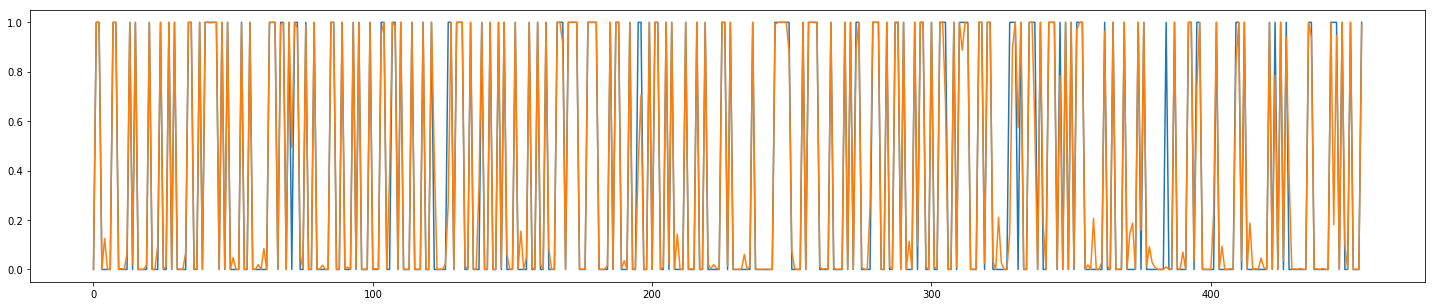

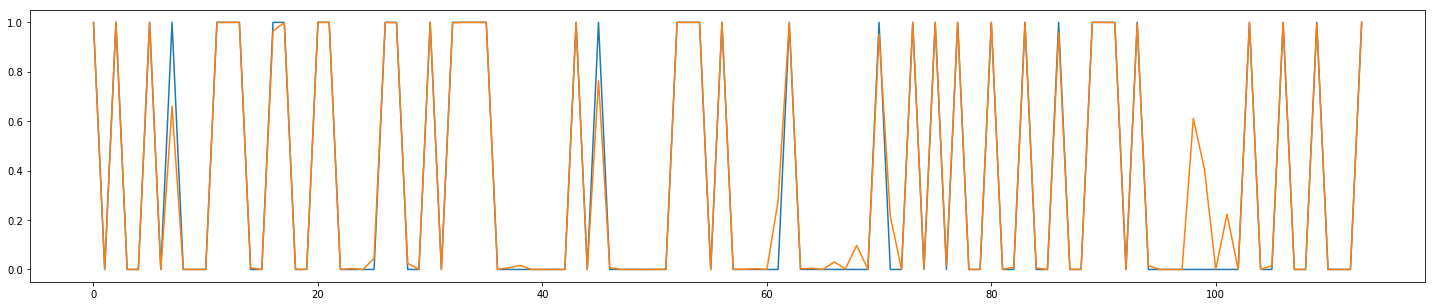

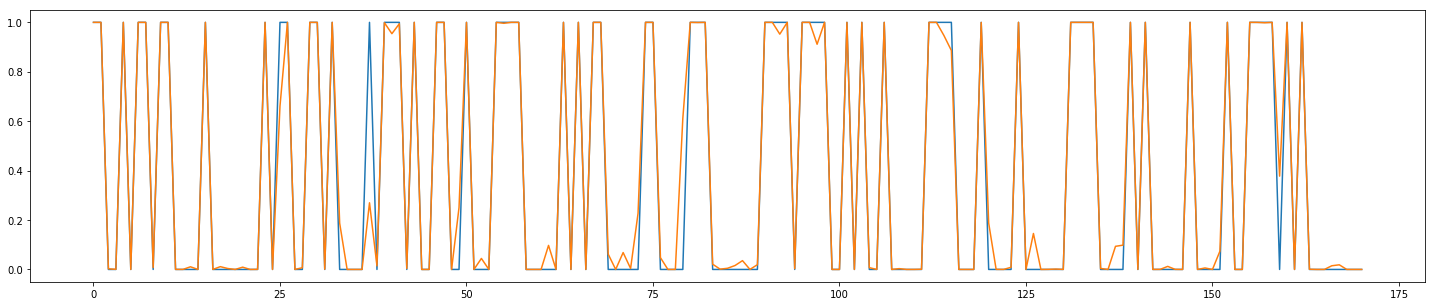

In [22]:
x = np.arange(0, len(y_train),1)
y_pred = model.predict(x_train)
plt.figure(figsize=(25, 5))
plt.plot(x, y_train, x , y_pred)

x = np.arange(0, len(y_val),1)
y_pred = model.predict(x_val)
plt.figure(figsize=(25, 5))
plt.plot(x, y_val, x , y_pred)

x = np.arange(0, len(y_test),1)
y_pred = model.predict(x_test)
plt.figure(figsize=(25, 5))
plt.plot(x, y_test, x , y_pred)

## Accuracy of traindata = 98.6%, validation data =99.1% , testing data =98.83% , for Learning rate = 0.01

## Case 2

In [36]:
optimizer = keras.optimizers.adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=3000, verbose=1, validation_data=(x_val, y_val))

Train on 455 samples, validate on 114 samples
Epoch 1/3000
455/455 [==============================] - 0s 610us/step - loss: 0.7140 - acc: 0.3802 - val_loss: 0.6881 - val_acc: 0.4649
Epoch 2/3000
455/455 [==============================] - 0s 140us/step - loss: 0.7039 - acc: 0.3846 - val_loss: 0.6818 - val_acc: 0.5088
Epoch 3/3000
455/455 [==============================] - 0s 142us/step - loss: 0.6947 - acc: 0.3934 - val_loss: 0.6760 - val_acc: 0.5877
Epoch 4/3000
455/455 [==============================] - 0s 145us/step - loss: 0.6858 - acc: 0.4527 - val_loss: 0.6702 - val_acc: 0.6140
Epoch 5/3000
455/455 [==============================] - 0s 147us/step - loss: 0.6779 - acc: 0.5143 - val_loss: 0.6647 - val_acc: 0.6404
Epoch 6/3000
455/455 [==============================] - 0s 129us/step - loss: 0.6703 - acc: 0.6066 - val_loss: 0.6582 - val_acc: 0.6579
Epoch 7/3000
455/455 [==============================] - 0s 118us/step - loss: 0.6631 - acc: 0.6879 - val_loss: 0.6529 - val_acc: 0.7193
Ep

455/455 [==============================] - 0s 112us/step - loss: 0.4363 - acc: 0.8901 - val_loss: 0.4462 - val_acc: 0.9123
Epoch 61/3000
455/455 [==============================] - 0s 112us/step - loss: 0.4339 - acc: 0.8879 - val_loss: 0.4435 - val_acc: 0.9123
Epoch 62/3000
455/455 [==============================] - 0s 107us/step - loss: 0.4312 - acc: 0.8901 - val_loss: 0.4404 - val_acc: 0.9123
Epoch 63/3000
455/455 [==============================] - 0s 110us/step - loss: 0.4288 - acc: 0.8923 - val_loss: 0.4371 - val_acc: 0.9123
Epoch 64/3000
455/455 [==============================] - 0s 107us/step - loss: 0.4264 - acc: 0.8901 - val_loss: 0.4351 - val_acc: 0.9123
Epoch 65/3000
455/455 [==============================] - 0s 105us/step - loss: 0.4239 - acc: 0.8923 - val_loss: 0.4332 - val_acc: 0.9123
Epoch 66/3000
455/455 [==============================] - 0s 107us/step - loss: 0.4216 - acc: 0.8923 - val_loss: 0.4310 - val_acc: 0.9123
Epoch 67/3000
455/455 [==============================] 

Epoch 120/3000
455/455 [==============================] - 0s 107us/step - loss: 0.3314 - acc: 0.9121 - val_loss: 0.3412 - val_acc: 0.9035
Epoch 121/3000
455/455 [==============================] - 0s 110us/step - loss: 0.3303 - acc: 0.9143 - val_loss: 0.3390 - val_acc: 0.9123
Epoch 122/3000
455/455 [==============================] - 0s 110us/step - loss: 0.3292 - acc: 0.9143 - val_loss: 0.3381 - val_acc: 0.9123
Epoch 123/3000
455/455 [==============================] - 0s 99us/step - loss: 0.3280 - acc: 0.9165 - val_loss: 0.3369 - val_acc: 0.9123
Epoch 124/3000
455/455 [==============================] - 0s 107us/step - loss: 0.3268 - acc: 0.9099 - val_loss: 0.3369 - val_acc: 0.9035
Epoch 125/3000
455/455 [==============================] - 0s 107us/step - loss: 0.3257 - acc: 0.9077 - val_loss: 0.3360 - val_acc: 0.9035
Epoch 126/3000
455/455 [==============================] - 0s 101us/step - loss: 0.3245 - acc: 0.9077 - val_loss: 0.3350 - val_acc: 0.9035
Epoch 127/3000
455/455 [===========

455/455 [==============================] - 0s 101us/step - loss: 0.2765 - acc: 0.9231 - val_loss: 0.2835 - val_acc: 0.9298
Epoch 180/3000
455/455 [==============================] - 0s 94us/step - loss: 0.2758 - acc: 0.9209 - val_loss: 0.2831 - val_acc: 0.9211
Epoch 181/3000
455/455 [==============================] - 0s 105us/step - loss: 0.2751 - acc: 0.9209 - val_loss: 0.2819 - val_acc: 0.9298
Epoch 182/3000
455/455 [==============================] - 0s 99us/step - loss: 0.2743 - acc: 0.9231 - val_loss: 0.2818 - val_acc: 0.9211
Epoch 183/3000
455/455 [==============================] - 0s 92us/step - loss: 0.2736 - acc: 0.9231 - val_loss: 0.2816 - val_acc: 0.9123
Epoch 184/3000
455/455 [==============================] - 0s 96us/step - loss: 0.2729 - acc: 0.9231 - val_loss: 0.2812 - val_acc: 0.9123
Epoch 185/3000
455/455 [==============================] - 0s 96us/step - loss: 0.2723 - acc: 0.9231 - val_loss: 0.2802 - val_acc: 0.9123
Epoch 186/3000
455/455 [==============================

455/455 [==============================] - 0s 103us/step - loss: 0.2407 - acc: 0.9297 - val_loss: 0.2462 - val_acc: 0.9298
Epoch 239/3000
455/455 [==============================] - 0s 114us/step - loss: 0.2403 - acc: 0.9319 - val_loss: 0.2454 - val_acc: 0.9298
Epoch 240/3000
455/455 [==============================] - 0s 96us/step - loss: 0.2398 - acc: 0.9341 - val_loss: 0.2450 - val_acc: 0.9298
Epoch 241/3000
455/455 [==============================] - 0s 96us/step - loss: 0.2392 - acc: 0.9319 - val_loss: 0.2444 - val_acc: 0.9298
Epoch 242/3000
455/455 [==============================] - 0s 101us/step - loss: 0.2388 - acc: 0.9341 - val_loss: 0.2435 - val_acc: 0.9298
Epoch 243/3000
455/455 [==============================] - 0s 99us/step - loss: 0.2383 - acc: 0.9341 - val_loss: 0.2431 - val_acc: 0.9298
Epoch 244/3000
455/455 [==============================] - 0s 92us/step - loss: 0.2377 - acc: 0.9341 - val_loss: 0.2432 - val_acc: 0.9298
Epoch 245/3000
455/455 [=============================

Epoch 298/3000
455/455 [==============================] - 0s 294us/step - loss: 0.2149 - acc: 0.9385 - val_loss: 0.2209 - val_acc: 0.9298
Epoch 299/3000
455/455 [==============================] - 0s 103us/step - loss: 0.2144 - acc: 0.9385 - val_loss: 0.2203 - val_acc: 0.9298
Epoch 300/3000
455/455 [==============================] - 0s 112us/step - loss: 0.2141 - acc: 0.9385 - val_loss: 0.2199 - val_acc: 0.9298
Epoch 301/3000
455/455 [==============================] - 0s 105us/step - loss: 0.2137 - acc: 0.9385 - val_loss: 0.2195 - val_acc: 0.9298
Epoch 302/3000
455/455 [==============================] - 0s 103us/step - loss: 0.2134 - acc: 0.9363 - val_loss: 0.2186 - val_acc: 0.9298
Epoch 303/3000
455/455 [==============================] - 0s 101us/step - loss: 0.2130 - acc: 0.9341 - val_loss: 0.2181 - val_acc: 0.9298
Epoch 304/3000
455/455 [==============================] - 0s 105us/step - loss: 0.2126 - acc: 0.9341 - val_loss: 0.2177 - val_acc: 0.9298
Epoch 305/3000
455/455 [==========

455/455 [==============================] - 0s 105us/step - loss: 0.1956 - acc: 0.9429 - val_loss: 0.2010 - val_acc: 0.9298
Epoch 358/3000
455/455 [==============================] - 0s 112us/step - loss: 0.1953 - acc: 0.9429 - val_loss: 0.2000 - val_acc: 0.9298
Epoch 359/3000
455/455 [==============================] - 0s 88us/step - loss: 0.1950 - acc: 0.9429 - val_loss: 0.1996 - val_acc: 0.9298
Epoch 360/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1950 - acc: 0.9429 - val_loss: 0.1992 - val_acc: 0.9298
Epoch 361/3000
455/455 [==============================] - 0s 69us/step - loss: 0.1944 - acc: 0.9429 - val_loss: 0.1993 - val_acc: 0.9298
Epoch 362/3000
455/455 [==============================] - 0s 69us/step - loss: 0.1942 - acc: 0.9429 - val_loss: 0.1994 - val_acc: 0.9298
Epoch 363/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1939 - acc: 0.9429 - val_loss: 0.1987 - val_acc: 0.9298
Epoch 364/3000
455/455 [============================

455/455 [==============================] - 0s 103us/step - loss: 0.1803 - acc: 0.9451 - val_loss: 0.1851 - val_acc: 0.9298
Epoch 417/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1801 - acc: 0.9451 - val_loss: 0.1847 - val_acc: 0.9298
Epoch 418/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1799 - acc: 0.9451 - val_loss: 0.1847 - val_acc: 0.9298
Epoch 419/3000
455/455 [==============================] - 0s 102us/step - loss: 0.1796 - acc: 0.9451 - val_loss: 0.1839 - val_acc: 0.9298
Epoch 420/3000
455/455 [==============================] - 0s 92us/step - loss: 0.1794 - acc: 0.9451 - val_loss: 0.1839 - val_acc: 0.9298
Epoch 421/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1792 - acc: 0.9451 - val_loss: 0.1839 - val_acc: 0.9298
Epoch 422/3000
455/455 [==============================] - 0s 125us/step - loss: 0.1790 - acc: 0.9451 - val_loss: 0.1836 - val_acc: 0.9298
Epoch 423/3000
455/455 [==========================

455/455 [==============================] - 0s 116us/step - loss: 0.1679 - acc: 0.9538 - val_loss: 0.1713 - val_acc: 0.9386
Epoch 476/3000
455/455 [==============================] - 0s 116us/step - loss: 0.1677 - acc: 0.9538 - val_loss: 0.1711 - val_acc: 0.9386
Epoch 477/3000
455/455 [==============================] - 0s 114us/step - loss: 0.1675 - acc: 0.9538 - val_loss: 0.1712 - val_acc: 0.9386
Epoch 478/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1674 - acc: 0.9538 - val_loss: 0.1713 - val_acc: 0.9386
Epoch 479/3000
455/455 [==============================] - 0s 112us/step - loss: 0.1670 - acc: 0.9538 - val_loss: 0.1714 - val_acc: 0.9386
Epoch 480/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1669 - acc: 0.9516 - val_loss: 0.1712 - val_acc: 0.9386
Epoch 481/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1667 - acc: 0.9516 - val_loss: 0.1711 - val_acc: 0.9386
Epoch 482/3000
455/455 [=========================

455/455 [==============================] - 0s 110us/step - loss: 0.1573 - acc: 0.9560 - val_loss: 0.1619 - val_acc: 0.9386
Epoch 535/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1571 - acc: 0.9560 - val_loss: 0.1615 - val_acc: 0.9386
Epoch 536/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1570 - acc: 0.9560 - val_loss: 0.1615 - val_acc: 0.9386
Epoch 537/3000
455/455 [==============================] - 0s 156us/step - loss: 0.1568 - acc: 0.9560 - val_loss: 0.1614 - val_acc: 0.9386
Epoch 538/3000
455/455 [==============================] - 0s 132us/step - loss: 0.1566 - acc: 0.9560 - val_loss: 0.1612 - val_acc: 0.9386
Epoch 539/3000
455/455 [==============================] - 0s 94us/step - loss: 0.1565 - acc: 0.9582 - val_loss: 0.1607 - val_acc: 0.9386
Epoch 540/3000
455/455 [==============================] - 0s 96us/step - loss: 0.1565 - acc: 0.9604 - val_loss: 0.1604 - val_acc: 0.9386
Epoch 541/3000
455/455 [===========================

455/455 [==============================] - 0s 96us/step - loss: 0.1484 - acc: 0.9626 - val_loss: 0.1525 - val_acc: 0.9386
Epoch 594/3000
455/455 [==============================] - 0s 96us/step - loss: 0.1482 - acc: 0.9626 - val_loss: 0.1525 - val_acc: 0.9386
Epoch 595/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1480 - acc: 0.9626 - val_loss: 0.1523 - val_acc: 0.9386
Epoch 596/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1479 - acc: 0.9626 - val_loss: 0.1523 - val_acc: 0.9386
Epoch 597/3000
455/455 [==============================] - 0s 94us/step - loss: 0.1478 - acc: 0.9604 - val_loss: 0.1524 - val_acc: 0.9386
Epoch 598/3000
455/455 [==============================] - 0s 99us/step - loss: 0.1476 - acc: 0.9604 - val_loss: 0.1524 - val_acc: 0.9386
Epoch 599/3000
455/455 [==============================] - 0s 94us/step - loss: 0.1475 - acc: 0.9604 - val_loss: 0.1522 - val_acc: 0.9386
Epoch 600/3000
455/455 [==============================

Epoch 653/3000
455/455 [==============================] - 0s 88us/step - loss: 0.1405 - acc: 0.9670 - val_loss: 0.1444 - val_acc: 0.9386
Epoch 654/3000
455/455 [==============================] - 0s 90us/step - loss: 0.1404 - acc: 0.9648 - val_loss: 0.1444 - val_acc: 0.9386
Epoch 655/3000
455/455 [==============================] - 0s 92us/step - loss: 0.1402 - acc: 0.9670 - val_loss: 0.1443 - val_acc: 0.9386
Epoch 656/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1401 - acc: 0.9670 - val_loss: 0.1442 - val_acc: 0.9386
Epoch 657/3000
455/455 [==============================] - 0s 158us/step - loss: 0.1400 - acc: 0.9670 - val_loss: 0.1442 - val_acc: 0.9386
Epoch 658/3000
455/455 [==============================] - 0s 121us/step - loss: 0.1399 - acc: 0.9670 - val_loss: 0.1440 - val_acc: 0.9386
Epoch 659/3000
455/455 [==============================] - 0s 112us/step - loss: 0.1398 - acc: 0.9670 - val_loss: 0.1442 - val_acc: 0.9386
Epoch 660/3000
455/455 [=============

455/455 [==============================] - 0s 245us/step - loss: 0.1337 - acc: 0.9648 - val_loss: 0.1375 - val_acc: 0.9386
Epoch 713/3000
455/455 [==============================] - 0s 226us/step - loss: 0.1336 - acc: 0.9648 - val_loss: 0.1373 - val_acc: 0.9386
Epoch 714/3000
455/455 [==============================] - 0s 162us/step - loss: 0.1335 - acc: 0.9648 - val_loss: 0.1373 - val_acc: 0.9386
Epoch 715/3000
455/455 [==============================] - 0s 125us/step - loss: 0.1334 - acc: 0.9648 - val_loss: 0.1372 - val_acc: 0.9386
Epoch 716/3000
455/455 [==============================] - 0s 140us/step - loss: 0.1333 - acc: 0.9648 - val_loss: 0.1375 - val_acc: 0.9386
Epoch 717/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1332 - acc: 0.9648 - val_loss: 0.1373 - val_acc: 0.9386
Epoch 718/3000
455/455 [==============================] - 0s 118us/step - loss: 0.1331 - acc: 0.9648 - val_loss: 0.1371 - val_acc: 0.9386
Epoch 719/3000
455/455 [=========================

455/455 [==============================] - 0s 110us/step - loss: 0.1279 - acc: 0.9648 - val_loss: 0.1322 - val_acc: 0.9474
Epoch 772/3000
455/455 [==============================] - 0s 116us/step - loss: 0.1278 - acc: 0.9648 - val_loss: 0.1322 - val_acc: 0.9474
Epoch 773/3000
455/455 [==============================] - 0s 129us/step - loss: 0.1278 - acc: 0.9648 - val_loss: 0.1318 - val_acc: 0.9474
Epoch 774/3000
455/455 [==============================] - 0s 112us/step - loss: 0.1276 - acc: 0.9648 - val_loss: 0.1320 - val_acc: 0.9474
Epoch 775/3000
455/455 [==============================] - 0s 132us/step - loss: 0.1276 - acc: 0.9670 - val_loss: 0.1323 - val_acc: 0.9474
Epoch 776/3000
455/455 [==============================] - 0s 121us/step - loss: 0.1274 - acc: 0.9670 - val_loss: 0.1320 - val_acc: 0.9474
Epoch 777/3000
455/455 [==============================] - 0s 107us/step - loss: 0.1273 - acc: 0.9670 - val_loss: 0.1318 - val_acc: 0.9474
Epoch 778/3000
455/455 [=========================

455/455 [==============================] - 0s 137us/step - loss: 0.1228 - acc: 0.9714 - val_loss: 0.1264 - val_acc: 0.9474
Epoch 831/3000
455/455 [==============================] - 0s 152us/step - loss: 0.1227 - acc: 0.9714 - val_loss: 0.1265 - val_acc: 0.9474
Epoch 832/3000
455/455 [==============================] - 0s 137us/step - loss: 0.1226 - acc: 0.9714 - val_loss: 0.1266 - val_acc: 0.9474
Epoch 833/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1226 - acc: 0.9714 - val_loss: 0.1270 - val_acc: 0.9474
Epoch 834/3000
455/455 [==============================] - 0s 152us/step - loss: 0.1225 - acc: 0.9714 - val_loss: 0.1268 - val_acc: 0.9474
Epoch 835/3000
455/455 [==============================] - 0s 119us/step - loss: 0.1223 - acc: 0.9714 - val_loss: 0.1263 - val_acc: 0.9474
Epoch 836/3000
455/455 [==============================] - 0s 67us/step - loss: 0.1223 - acc: 0.9714 - val_loss: 0.1263 - val_acc: 0.9474
Epoch 837/3000
455/455 [==========================

455/455 [==============================] - 0s 123us/step - loss: 0.1184 - acc: 0.9714 - val_loss: 0.1223 - val_acc: 0.9474
Epoch 890/3000
455/455 [==============================] - 0s 123us/step - loss: 0.1184 - acc: 0.9714 - val_loss: 0.1220 - val_acc: 0.9474
Epoch 891/3000
455/455 [==============================] - 0s 116us/step - loss: 0.1182 - acc: 0.9714 - val_loss: 0.1222 - val_acc: 0.9474
Epoch 892/3000
455/455 [==============================] - 0s 121us/step - loss: 0.1182 - acc: 0.9714 - val_loss: 0.1221 - val_acc: 0.9474
Epoch 893/3000
455/455 [==============================] - 0s 118us/step - loss: 0.1181 - acc: 0.9714 - val_loss: 0.1220 - val_acc: 0.9474
Epoch 894/3000
455/455 [==============================] - 0s 134us/step - loss: 0.1181 - acc: 0.9714 - val_loss: 0.1217 - val_acc: 0.9474
Epoch 895/3000
455/455 [==============================] - 0s 118us/step - loss: 0.1180 - acc: 0.9714 - val_loss: 0.1220 - val_acc: 0.9474
Epoch 896/3000
455/455 [=========================

455/455 [==============================] - 0s 101us/step - loss: 0.1143 - acc: 0.9736 - val_loss: 0.1183 - val_acc: 0.9474
Epoch 949/3000
455/455 [==============================] - 0s 107us/step - loss: 0.1142 - acc: 0.9736 - val_loss: 0.1182 - val_acc: 0.9474
Epoch 950/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1142 - acc: 0.9736 - val_loss: 0.1182 - val_acc: 0.9474
Epoch 951/3000
455/455 [==============================] - 0s 118us/step - loss: 0.1141 - acc: 0.9736 - val_loss: 0.1181 - val_acc: 0.9474
Epoch 952/3000
455/455 [==============================] - 0s 107us/step - loss: 0.1141 - acc: 0.9736 - val_loss: 0.1176 - val_acc: 0.9474
Epoch 953/3000
455/455 [==============================] - 0s 99us/step - loss: 0.1140 - acc: 0.9736 - val_loss: 0.1175 - val_acc: 0.9474
Epoch 954/3000
455/455 [==============================] - 0s 103us/step - loss: 0.1140 - acc: 0.9736 - val_loss: 0.1173 - val_acc: 0.9474
Epoch 955/3000
455/455 [==========================

455/455 [==============================] - 0s 101us/step - loss: 0.1105 - acc: 0.9736 - val_loss: 0.1149 - val_acc: 0.9474
Epoch 1008/3000
455/455 [==============================] - 0s 99us/step - loss: 0.1105 - acc: 0.9736 - val_loss: 0.1152 - val_acc: 0.9474
Epoch 1009/3000
455/455 [==============================] - 0s 94us/step - loss: 0.1106 - acc: 0.9736 - val_loss: 0.1155 - val_acc: 0.9474
Epoch 1010/3000
455/455 [==============================] - 0s 129us/step - loss: 0.1104 - acc: 0.9714 - val_loss: 0.1152 - val_acc: 0.9474
Epoch 1011/3000
455/455 [==============================] - 0s 121us/step - loss: 0.1104 - acc: 0.9714 - val_loss: 0.1153 - val_acc: 0.9474
Epoch 1012/3000
455/455 [==============================] - 0s 127us/step - loss: 0.1103 - acc: 0.9714 - val_loss: 0.1150 - val_acc: 0.9474
Epoch 1013/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1103 - acc: 0.9714 - val_loss: 0.1150 - val_acc: 0.9474
Epoch 1014/3000
455/455 [====================

455/455 [==============================] - 0s 101us/step - loss: 0.1072 - acc: 0.9758 - val_loss: 0.1117 - val_acc: 0.9474
Epoch 1067/3000
455/455 [==============================] - 0s 96us/step - loss: 0.1071 - acc: 0.9758 - val_loss: 0.1117 - val_acc: 0.9474
Epoch 1068/3000
455/455 [==============================] - 0s 154us/step - loss: 0.1072 - acc: 0.9758 - val_loss: 0.1113 - val_acc: 0.9474
Epoch 1069/3000
455/455 [==============================] - 0s 293us/step - loss: 0.1070 - acc: 0.9758 - val_loss: 0.1114 - val_acc: 0.9474
Epoch 1070/3000
455/455 [==============================] - 0s 118us/step - loss: 0.1070 - acc: 0.9758 - val_loss: 0.1113 - val_acc: 0.9474
Epoch 1071/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1069 - acc: 0.9780 - val_loss: 0.1108 - val_acc: 0.9474
Epoch 1072/3000
455/455 [==============================] - 0s 116us/step - loss: 0.1068 - acc: 0.9780 - val_loss: 0.1107 - val_acc: 0.9474
Epoch 1073/3000
455/455 [===================

455/455 [==============================] - 0s 114us/step - loss: 0.1043 - acc: 0.9802 - val_loss: 0.1074 - val_acc: 0.9474
Epoch 1126/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1042 - acc: 0.9802 - val_loss: 0.1074 - val_acc: 0.9474
Epoch 1127/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1041 - acc: 0.9802 - val_loss: 0.1073 - val_acc: 0.9474
Epoch 1128/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1042 - acc: 0.9802 - val_loss: 0.1068 - val_acc: 0.9474
Epoch 1129/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1042 - acc: 0.9802 - val_loss: 0.1068 - val_acc: 0.9474
Epoch 1130/3000
455/455 [==============================] - 0s 96us/step - loss: 0.1041 - acc: 0.9802 - val_loss: 0.1069 - val_acc: 0.9474
Epoch 1131/3000
455/455 [==============================] - 0s 99us/step - loss: 0.1040 - acc: 0.9802 - val_loss: 0.1071 - val_acc: 0.9474
Epoch 1132/3000
455/455 [====================

455/455 [==============================] - 0s 116us/step - loss: 0.1015 - acc: 0.9802 - val_loss: 0.1056 - val_acc: 0.9474
Epoch 1185/3000
455/455 [==============================] - 0s 110us/step - loss: 0.1015 - acc: 0.9802 - val_loss: 0.1055 - val_acc: 0.9474
Epoch 1186/3000
455/455 [==============================] - 0s 99us/step - loss: 0.1014 - acc: 0.9802 - val_loss: 0.1055 - val_acc: 0.9474
Epoch 1187/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1014 - acc: 0.9802 - val_loss: 0.1053 - val_acc: 0.9474
Epoch 1188/3000
455/455 [==============================] - 0s 114us/step - loss: 0.1013 - acc: 0.9802 - val_loss: 0.1058 - val_acc: 0.9474
Epoch 1189/3000
455/455 [==============================] - 0s 101us/step - loss: 0.1013 - acc: 0.9802 - val_loss: 0.1058 - val_acc: 0.9474
Epoch 1190/3000
455/455 [==============================] - 0s 105us/step - loss: 0.1013 - acc: 0.9802 - val_loss: 0.1056 - val_acc: 0.9474
Epoch 1191/3000
455/455 [===================

455/455 [==============================] - 0s 123us/step - loss: 0.0990 - acc: 0.9802 - val_loss: 0.1033 - val_acc: 0.9474
Epoch 1244/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0989 - acc: 0.9802 - val_loss: 0.1035 - val_acc: 0.9474
Epoch 1245/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0989 - acc: 0.9802 - val_loss: 0.1033 - val_acc: 0.9474
Epoch 1246/3000
455/455 [==============================] - 0s 122us/step - loss: 0.0989 - acc: 0.9802 - val_loss: 0.1032 - val_acc: 0.9474
Epoch 1247/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0989 - acc: 0.9802 - val_loss: 0.1033 - val_acc: 0.9474
Epoch 1248/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0988 - acc: 0.9802 - val_loss: 0.1033 - val_acc: 0.9474
Epoch 1249/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0988 - acc: 0.9802 - val_loss: 0.1034 - val_acc: 0.9474
Epoch 1250/3000
455/455 [==================

455/455 [==============================] - 0s 114us/step - loss: 0.0968 - acc: 0.9802 - val_loss: 0.1003 - val_acc: 0.9561
Epoch 1303/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0967 - acc: 0.9802 - val_loss: 0.1004 - val_acc: 0.9561
Epoch 1304/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0967 - acc: 0.9802 - val_loss: 0.1002 - val_acc: 0.9561
Epoch 1305/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0967 - acc: 0.9802 - val_loss: 0.1000 - val_acc: 0.9561
Epoch 1306/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0967 - acc: 0.9802 - val_loss: 0.1002 - val_acc: 0.9561
Epoch 1307/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0967 - acc: 0.9802 - val_loss: 0.1000 - val_acc: 0.9561
Epoch 1308/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0966 - acc: 0.9802 - val_loss: 0.1001 - val_acc: 0.9561
Epoch 1309/3000
455/455 [==================

455/455 [==============================] - 0s 107us/step - loss: 0.0948 - acc: 0.9802 - val_loss: 0.0988 - val_acc: 0.9561
Epoch 1362/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0948 - acc: 0.9802 - val_loss: 0.0985 - val_acc: 0.9561
Epoch 1363/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0947 - acc: 0.9802 - val_loss: 0.0984 - val_acc: 0.9561
Epoch 1364/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0947 - acc: 0.9802 - val_loss: 0.0981 - val_acc: 0.9561
Epoch 1365/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0946 - acc: 0.9802 - val_loss: 0.0981 - val_acc: 0.9561
Epoch 1366/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0946 - acc: 0.9802 - val_loss: 0.0981 - val_acc: 0.9561
Epoch 1367/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0946 - acc: 0.9802 - val_loss: 0.0980 - val_acc: 0.9561
Epoch 1368/3000
455/455 [===================

455/455 [==============================] - 0s 125us/step - loss: 0.0928 - acc: 0.9802 - val_loss: 0.0967 - val_acc: 0.9561
Epoch 1421/3000
455/455 [==============================] - 0s 132us/step - loss: 0.0928 - acc: 0.9802 - val_loss: 0.0966 - val_acc: 0.9561
Epoch 1422/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0928 - acc: 0.9802 - val_loss: 0.0965 - val_acc: 0.9561
Epoch 1423/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0928 - acc: 0.9802 - val_loss: 0.0967 - val_acc: 0.9561
Epoch 1424/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0927 - acc: 0.9802 - val_loss: 0.0965 - val_acc: 0.9561
Epoch 1425/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0927 - acc: 0.9802 - val_loss: 0.0965 - val_acc: 0.9561
Epoch 1426/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0926 - acc: 0.9824 - val_loss: 0.0967 - val_acc: 0.9561
Epoch 1427/3000
455/455 [==================

455/455 [==============================] - 0s 123us/step - loss: 0.0911 - acc: 0.9824 - val_loss: 0.0954 - val_acc: 0.9561
Epoch 1480/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0911 - acc: 0.9824 - val_loss: 0.0957 - val_acc: 0.9561
Epoch 1481/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0910 - acc: 0.9824 - val_loss: 0.0956 - val_acc: 0.9561
Epoch 1482/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0910 - acc: 0.9824 - val_loss: 0.0957 - val_acc: 0.9561
Epoch 1483/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0910 - acc: 0.9824 - val_loss: 0.0955 - val_acc: 0.9561
Epoch 1484/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0910 - acc: 0.9824 - val_loss: 0.0956 - val_acc: 0.9561
Epoch 1485/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0910 - acc: 0.9824 - val_loss: 0.0951 - val_acc: 0.9561
Epoch 1486/3000
455/455 [==================

455/455 [==============================] - 0s 99us/step - loss: 0.0893 - acc: 0.9824 - val_loss: 0.0931 - val_acc: 0.9561
Epoch 1539/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0893 - acc: 0.9824 - val_loss: 0.0931 - val_acc: 0.9561
Epoch 1540/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0893 - acc: 0.9824 - val_loss: 0.0932 - val_acc: 0.9561
Epoch 1541/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0892 - acc: 0.9824 - val_loss: 0.0932 - val_acc: 0.9561
Epoch 1542/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0892 - acc: 0.9824 - val_loss: 0.0933 - val_acc: 0.9561
Epoch 1543/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0892 - acc: 0.9824 - val_loss: 0.0933 - val_acc: 0.9561
Epoch 1544/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0892 - acc: 0.9824 - val_loss: 0.0935 - val_acc: 0.9561
Epoch 1545/3000
455/455 [===================

455/455 [==============================] - 0s 107us/step - loss: 0.0877 - acc: 0.9824 - val_loss: 0.0923 - val_acc: 0.9561
Epoch 1598/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0877 - acc: 0.9824 - val_loss: 0.0921 - val_acc: 0.9561
Epoch 1599/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0876 - acc: 0.9824 - val_loss: 0.0920 - val_acc: 0.9561
Epoch 1600/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0876 - acc: 0.9824 - val_loss: 0.0917 - val_acc: 0.9561
Epoch 1601/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0876 - acc: 0.9824 - val_loss: 0.0917 - val_acc: 0.9561
Epoch 1602/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0875 - acc: 0.9824 - val_loss: 0.0916 - val_acc: 0.9561
Epoch 1603/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0876 - acc: 0.9824 - val_loss: 0.0915 - val_acc: 0.9649
Epoch 1604/3000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0862 - acc: 0.9824 - val_loss: 0.0909 - val_acc: 0.9561
Epoch 1657/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0862 - acc: 0.9824 - val_loss: 0.0907 - val_acc: 0.9561
Epoch 1658/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0861 - acc: 0.9824 - val_loss: 0.0907 - val_acc: 0.9561
Epoch 1659/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0862 - acc: 0.9824 - val_loss: 0.0910 - val_acc: 0.9561
Epoch 1660/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0861 - acc: 0.9824 - val_loss: 0.0909 - val_acc: 0.9561
Epoch 1661/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0860 - acc: 0.9824 - val_loss: 0.0909 - val_acc: 0.9561
Epoch 1662/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0860 - acc: 0.9824 - val_loss: 0.0909 - val_acc: 0.9561
Epoch 1663/3000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0847 - acc: 0.9824 - val_loss: 0.0890 - val_acc: 0.9649
Epoch 1716/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0847 - acc: 0.9824 - val_loss: 0.0886 - val_acc: 0.9737
Epoch 1717/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0848 - acc: 0.9802 - val_loss: 0.0882 - val_acc: 0.9912
Epoch 1718/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0849 - acc: 0.9802 - val_loss: 0.0884 - val_acc: 0.9825
Epoch 1719/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0848 - acc: 0.9802 - val_loss: 0.0885 - val_acc: 0.9737
Epoch 1720/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0847 - acc: 0.9824 - val_loss: 0.0886 - val_acc: 0.9649
Epoch 1721/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0846 - acc: 0.9824 - val_loss: 0.0887 - val_acc: 0.9649
Epoch 1722/3000
455/455 [==================

455/455 [==============================] - 0s 131us/step - loss: 0.0835 - acc: 0.9824 - val_loss: 0.0883 - val_acc: 0.9561
Epoch 1775/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0834 - acc: 0.9824 - val_loss: 0.0878 - val_acc: 0.9737
Epoch 1776/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0834 - acc: 0.9824 - val_loss: 0.0877 - val_acc: 0.9737
Epoch 1777/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0835 - acc: 0.9802 - val_loss: 0.0873 - val_acc: 0.9825
Epoch 1778/3000
455/455 [==============================] - 0s 100us/step - loss: 0.0834 - acc: 0.9824 - val_loss: 0.0874 - val_acc: 0.9737
Epoch 1779/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0834 - acc: 0.9824 - val_loss: 0.0876 - val_acc: 0.9737
Epoch 1780/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0833 - acc: 0.9824 - val_loss: 0.0875 - val_acc: 0.9737
Epoch 1781/3000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0822 - acc: 0.9824 - val_loss: 0.0869 - val_acc: 0.9737
Epoch 1834/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0822 - acc: 0.9824 - val_loss: 0.0870 - val_acc: 0.9561
Epoch 1835/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0822 - acc: 0.9824 - val_loss: 0.0871 - val_acc: 0.9561
Epoch 1836/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0821 - acc: 0.9824 - val_loss: 0.0868 - val_acc: 0.9737
Epoch 1837/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0821 - acc: 0.9824 - val_loss: 0.0867 - val_acc: 0.9737
Epoch 1838/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0821 - acc: 0.9824 - val_loss: 0.0870 - val_acc: 0.9561
Epoch 1839/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0821 - acc: 0.9824 - val_loss: 0.0872 - val_acc: 0.9561
Epoch 1840/3000
455/455 [==================

455/455 [==============================] - 0s 101us/step - loss: 0.0811 - acc: 0.9824 - val_loss: 0.0861 - val_acc: 0.9649
Epoch 1893/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0811 - acc: 0.9824 - val_loss: 0.0860 - val_acc: 0.9737
Epoch 1894/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0810 - acc: 0.9824 - val_loss: 0.0859 - val_acc: 0.9737
Epoch 1895/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0810 - acc: 0.9824 - val_loss: 0.0860 - val_acc: 0.9737
Epoch 1896/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0810 - acc: 0.9824 - val_loss: 0.0859 - val_acc: 0.9737
Epoch 1897/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0809 - acc: 0.9824 - val_loss: 0.0857 - val_acc: 0.9825
Epoch 1898/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0810 - acc: 0.9824 - val_loss: 0.0855 - val_acc: 0.9825
Epoch 1899/3000
455/455 [=====================

455/455 [==============================] - 0s 114us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0854 - val_acc: 0.9561
Epoch 1952/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0854 - val_acc: 0.9561
Epoch 1953/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0855 - val_acc: 0.9561
Epoch 1954/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0852 - val_acc: 0.9737
Epoch 1955/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0798 - acc: 0.9824 - val_loss: 0.0853 - val_acc: 0.9561
Epoch 1956/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0856 - val_acc: 0.9561
Epoch 1957/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0799 - acc: 0.9824 - val_loss: 0.0855 - val_acc: 0.9561
Epoch 1958/3000
455/455 [===================

455/455 [==============================] - 0s 99us/step - loss: 0.0788 - acc: 0.9824 - val_loss: 0.0841 - val_acc: 0.9825
Epoch 2011/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0788 - acc: 0.9824 - val_loss: 0.0840 - val_acc: 0.9825
Epoch 2012/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0788 - acc: 0.9824 - val_loss: 0.0839 - val_acc: 0.9825
Epoch 2013/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0788 - acc: 0.9824 - val_loss: 0.0837 - val_acc: 0.9825
Epoch 2014/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0788 - acc: 0.9824 - val_loss: 0.0840 - val_acc: 0.9825
Epoch 2015/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0788 - acc: 0.9824 - val_loss: 0.0840 - val_acc: 0.9825
Epoch 2016/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0787 - acc: 0.9824 - val_loss: 0.0843 - val_acc: 0.9737
Epoch 2017/3000
455/455 [======================

455/455 [==============================] - 0s 114us/step - loss: 0.0779 - acc: 0.9824 - val_loss: 0.0828 - val_acc: 0.9825
Epoch 2070/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0778 - acc: 0.9824 - val_loss: 0.0830 - val_acc: 0.9825
Epoch 2071/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0778 - acc: 0.9824 - val_loss: 0.0832 - val_acc: 0.9825
Epoch 2072/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0778 - acc: 0.9824 - val_loss: 0.0833 - val_acc: 0.9825
Epoch 2073/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0778 - acc: 0.9824 - val_loss: 0.0833 - val_acc: 0.9737
Epoch 2074/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0778 - acc: 0.9824 - val_loss: 0.0834 - val_acc: 0.9737
Epoch 2075/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0778 - acc: 0.9824 - val_loss: 0.0835 - val_acc: 0.9737
Epoch 2076/3000
455/455 [====================

455/455 [==============================] - 0s 94us/step - loss: 0.0769 - acc: 0.9824 - val_loss: 0.0825 - val_acc: 0.9825
Epoch 2129/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0769 - acc: 0.9824 - val_loss: 0.0824 - val_acc: 0.9825
Epoch 2130/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0770 - acc: 0.9824 - val_loss: 0.0830 - val_acc: 0.9737
Epoch 2131/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0770 - acc: 0.9824 - val_loss: 0.0826 - val_acc: 0.9737
Epoch 2132/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0769 - acc: 0.9824 - val_loss: 0.0827 - val_acc: 0.9737
Epoch 2133/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0769 - acc: 0.9824 - val_loss: 0.0825 - val_acc: 0.9825
Epoch 2134/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0769 - acc: 0.9824 - val_loss: 0.0824 - val_acc: 0.9825
Epoch 2135/3000
455/455 [========================

455/455 [==============================] - 0s 107us/step - loss: 0.0760 - acc: 0.9824 - val_loss: 0.0815 - val_acc: 0.9825
Epoch 2188/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0760 - acc: 0.9824 - val_loss: 0.0817 - val_acc: 0.9825
Epoch 2189/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0760 - acc: 0.9824 - val_loss: 0.0815 - val_acc: 0.9825
Epoch 2190/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0760 - acc: 0.9824 - val_loss: 0.0816 - val_acc: 0.9825
Epoch 2191/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0759 - acc: 0.9824 - val_loss: 0.0813 - val_acc: 0.9825
Epoch 2192/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0762 - acc: 0.9824 - val_loss: 0.0807 - val_acc: 0.9912
Epoch 2193/3000
455/455 [==============================] - 0s 96us/step - loss: 0.0759 - acc: 0.9824 - val_loss: 0.0805 - val_acc: 0.9912
Epoch 2194/3000
455/455 [====================

455/455 [==============================] - 0s 112us/step - loss: 0.0752 - acc: 0.9824 - val_loss: 0.0797 - val_acc: 0.9912
Epoch 2247/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0752 - acc: 0.9824 - val_loss: 0.0799 - val_acc: 0.9912
Epoch 2248/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0752 - acc: 0.9824 - val_loss: 0.0801 - val_acc: 0.9912
Epoch 2249/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0751 - acc: 0.9824 - val_loss: 0.0802 - val_acc: 0.9912
Epoch 2250/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0752 - acc: 0.9824 - val_loss: 0.0805 - val_acc: 0.9825
Epoch 2251/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0751 - acc: 0.9824 - val_loss: 0.0805 - val_acc: 0.9825
Epoch 2252/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0751 - acc: 0.9824 - val_loss: 0.0805 - val_acc: 0.9825
Epoch 2253/3000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0744 - acc: 0.9824 - val_loss: 0.0802 - val_acc: 0.9825
Epoch 2306/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0744 - acc: 0.9824 - val_loss: 0.0801 - val_acc: 0.9825
Epoch 2307/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0744 - acc: 0.9824 - val_loss: 0.0799 - val_acc: 0.9825
Epoch 2308/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0743 - acc: 0.9824 - val_loss: 0.0799 - val_acc: 0.9825
Epoch 2309/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0743 - acc: 0.9824 - val_loss: 0.0799 - val_acc: 0.9825
Epoch 2310/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0743 - acc: 0.9824 - val_loss: 0.0800 - val_acc: 0.9825
Epoch 2311/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0743 - acc: 0.9824 - val_loss: 0.0799 - val_acc: 0.9825
Epoch 2312/3000
455/455 [==================

455/455 [==============================] - 0s 105us/step - loss: 0.0737 - acc: 0.9824 - val_loss: 0.0799 - val_acc: 0.9825
Epoch 2365/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0736 - acc: 0.9824 - val_loss: 0.0796 - val_acc: 0.9825
Epoch 2366/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0736 - acc: 0.9824 - val_loss: 0.0794 - val_acc: 0.9825
Epoch 2367/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0736 - acc: 0.9824 - val_loss: 0.0794 - val_acc: 0.9825
Epoch 2368/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0736 - acc: 0.9824 - val_loss: 0.0793 - val_acc: 0.9825
Epoch 2369/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0735 - acc: 0.9824 - val_loss: 0.0793 - val_acc: 0.9825
Epoch 2370/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0735 - acc: 0.9824 - val_loss: 0.0792 - val_acc: 0.9825
Epoch 2371/3000
455/455 [===================

455/455 [==============================] - 0s 101us/step - loss: 0.0728 - acc: 0.9824 - val_loss: 0.0790 - val_acc: 0.9825
Epoch 2424/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0729 - acc: 0.9824 - val_loss: 0.0790 - val_acc: 0.9825
Epoch 2425/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0729 - acc: 0.9824 - val_loss: 0.0792 - val_acc: 0.9825
Epoch 2426/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0728 - acc: 0.9824 - val_loss: 0.0788 - val_acc: 0.9825
Epoch 2427/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0728 - acc: 0.9824 - val_loss: 0.0786 - val_acc: 0.9825
Epoch 2428/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0728 - acc: 0.9824 - val_loss: 0.0787 - val_acc: 0.9825
Epoch 2429/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0728 - acc: 0.9824 - val_loss: 0.0786 - val_acc: 0.9825
Epoch 2430/3000
455/455 [====================

455/455 [==============================] - 0s 92us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0783 - val_acc: 0.9825
Epoch 2483/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0784 - val_acc: 0.9825
Epoch 2484/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0783 - val_acc: 0.9825
Epoch 2485/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0783 - val_acc: 0.9825
Epoch 2486/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0782 - val_acc: 0.9825
Epoch 2487/3000
455/455 [==============================] - 0s 140us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0779 - val_acc: 0.9912
Epoch 2488/3000
455/455 [==============================] - 0s 346us/step - loss: 0.0721 - acc: 0.9824 - val_loss: 0.0783 - val_acc: 0.9825
Epoch 2489/3000
455/455 [===================

455/455 [==============================] - 0s 112us/step - loss: 0.0715 - acc: 0.9824 - val_loss: 0.0775 - val_acc: 0.9825
Epoch 2542/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0715 - acc: 0.9824 - val_loss: 0.0776 - val_acc: 0.9825
Epoch 2543/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0714 - acc: 0.9824 - val_loss: 0.0775 - val_acc: 0.9825
Epoch 2544/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0714 - acc: 0.9824 - val_loss: 0.0775 - val_acc: 0.9825
Epoch 2545/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0715 - acc: 0.9824 - val_loss: 0.0774 - val_acc: 0.9912
Epoch 2546/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0714 - acc: 0.9824 - val_loss: 0.0778 - val_acc: 0.9825
Epoch 2547/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0714 - acc: 0.9824 - val_loss: 0.0778 - val_acc: 0.9825
Epoch 2548/3000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0769 - val_acc: 0.9825
Epoch 2601/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0770 - val_acc: 0.9825
Epoch 2602/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0770 - val_acc: 0.9825
Epoch 2603/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0768 - val_acc: 0.9912
Epoch 2604/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0764 - val_acc: 0.9912
Epoch 2605/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0764 - val_acc: 0.9912
Epoch 2606/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0708 - acc: 0.9824 - val_loss: 0.0764 - val_acc: 0.9912
Epoch 2607/3000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0765 - val_acc: 0.9825
Epoch 2660/3000
455/455 [==============================] - 0s 132us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0766 - val_acc: 0.9825
Epoch 2661/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0767 - val_acc: 0.9825
Epoch 2662/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0767 - val_acc: 0.9825
Epoch 2663/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0764 - val_acc: 0.9825
Epoch 2664/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0762 - val_acc: 0.9912
Epoch 2665/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.0763 - val_acc: 0.9912
Epoch 2666/3000
455/455 [==================

455/455 [==============================] - 0s 116us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0759 - val_acc: 0.9912
Epoch 2719/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0759 - val_acc: 0.9912
Epoch 2720/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0760 - val_acc: 0.9825
Epoch 2721/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0761 - val_acc: 0.9825
Epoch 2722/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0760 - val_acc: 0.9825
Epoch 2723/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0758 - val_acc: 0.9912
Epoch 2724/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0696 - acc: 0.9824 - val_loss: 0.0758 - val_acc: 0.9912
Epoch 2725/3000
455/455 [===================

455/455 [==============================] - 0s 103us/step - loss: 0.0691 - acc: 0.9824 - val_loss: 0.0760 - val_acc: 0.9825
Epoch 2778/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0691 - acc: 0.9824 - val_loss: 0.0763 - val_acc: 0.9825
Epoch 2779/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0691 - acc: 0.9824 - val_loss: 0.0767 - val_acc: 0.9825
Epoch 2780/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0692 - acc: 0.9824 - val_loss: 0.0765 - val_acc: 0.9825
Epoch 2781/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0692 - acc: 0.9824 - val_loss: 0.0769 - val_acc: 0.9825
Epoch 2782/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0692 - acc: 0.9846 - val_loss: 0.0770 - val_acc: 0.9825
Epoch 2783/3000
455/455 [==============================] - 0s 94us/step - loss: 0.0691 - acc: 0.9824 - val_loss: 0.0767 - val_acc: 0.9825
Epoch 2784/3000
455/455 [=====================

455/455 [==============================] - 0s 96us/step - loss: 0.0686 - acc: 0.9824 - val_loss: 0.0749 - val_acc: 0.9912
Epoch 2837/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0686 - acc: 0.9824 - val_loss: 0.0752 - val_acc: 0.9825
Epoch 2838/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0685 - acc: 0.9824 - val_loss: 0.0752 - val_acc: 0.9825
Epoch 2839/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0685 - acc: 0.9824 - val_loss: 0.0752 - val_acc: 0.9825
Epoch 2840/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0685 - acc: 0.9824 - val_loss: 0.0751 - val_acc: 0.9825
Epoch 2841/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0686 - acc: 0.9824 - val_loss: 0.0755 - val_acc: 0.9825
Epoch 2842/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0685 - acc: 0.9824 - val_loss: 0.0751 - val_acc: 0.9825
Epoch 2843/3000
455/455 [===================

455/455 [==============================] - 0s 110us/step - loss: 0.0680 - acc: 0.9824 - val_loss: 0.0752 - val_acc: 0.9825
Epoch 2896/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0680 - acc: 0.9824 - val_loss: 0.0751 - val_acc: 0.9825
Epoch 2897/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0680 - acc: 0.9824 - val_loss: 0.0747 - val_acc: 0.9912
Epoch 2898/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0680 - acc: 0.9824 - val_loss: 0.0746 - val_acc: 0.9912
Epoch 2899/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0680 - acc: 0.9824 - val_loss: 0.0746 - val_acc: 0.9912
Epoch 2900/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0680 - acc: 0.9824 - val_loss: 0.0744 - val_acc: 0.9912
Epoch 2901/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0680 - acc: 0.9846 - val_loss: 0.0745 - val_acc: 0.9912
Epoch 2902/3000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0676 - acc: 0.9846 - val_loss: 0.0734 - val_acc: 0.9912
Epoch 2955/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0676 - acc: 0.9846 - val_loss: 0.0737 - val_acc: 0.9912
Epoch 2956/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0675 - acc: 0.9846 - val_loss: 0.0738 - val_acc: 0.9912
Epoch 2957/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0676 - acc: 0.9846 - val_loss: 0.0740 - val_acc: 0.9912
Epoch 2958/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0676 - acc: 0.9846 - val_loss: 0.0742 - val_acc: 0.9912
Epoch 2959/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0675 - acc: 0.9846 - val_loss: 0.0738 - val_acc: 0.9912
Epoch 2960/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0675 - acc: 0.9846 - val_loss: 0.0738 - val_acc: 0.9912
Epoch 2961/3000
455/455 [==================

In [37]:
score_train, score_valid,score_test = loss_eval(x_train, y_train, x_val, y_val,x_test,y_test, 128)
print(score_train, score_valid,score_test)

171/171 [==============================] - 0s 29us/step
[0.06711963167884848, 0.9824175824175824] [0.07424286007881165, 0.9824561476707458] [0.08343037069715255, 0.9766081843459815]


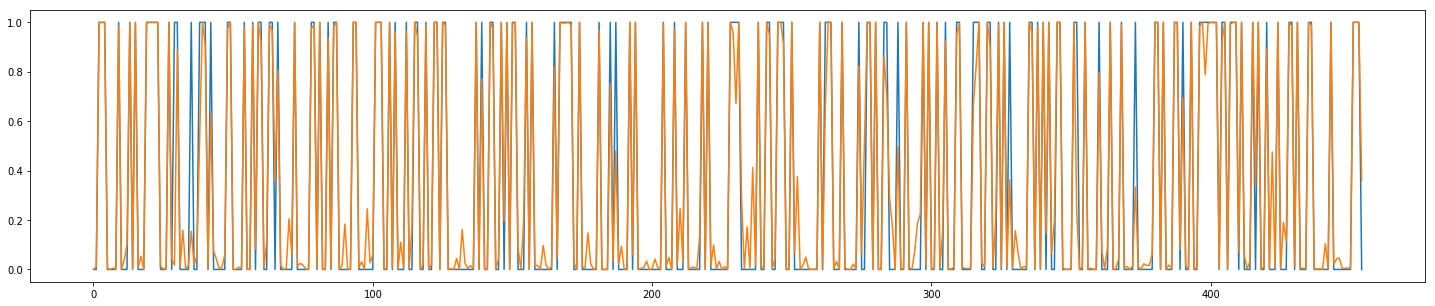

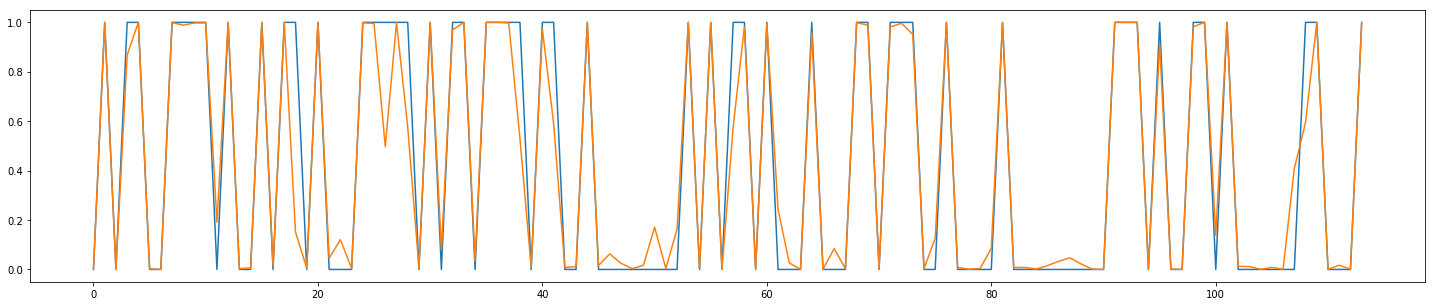

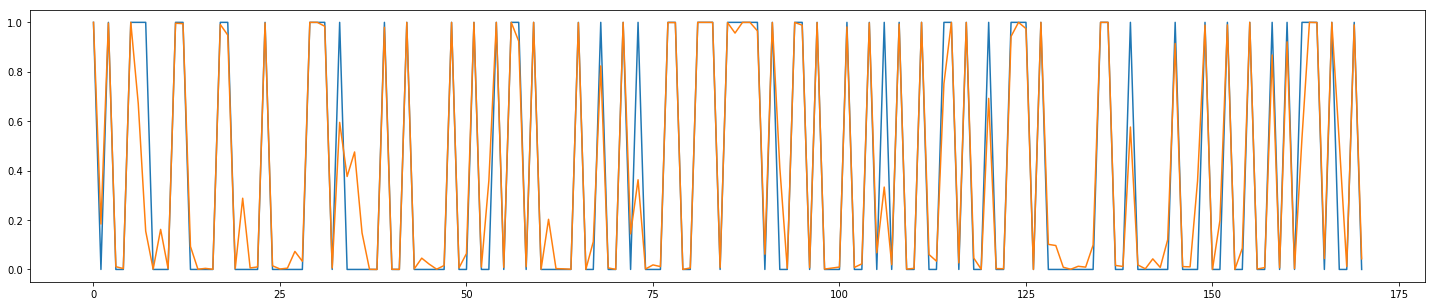

In [38]:
x = np.arange(0, len(y_train),1)
y_pred = model.predict(x_train)
plt.figure(figsize=(25, 5))
plt.plot(x, y_train, x , y_pred)

x = np.arange(0, len(y_val),1)
y_pred = model.predict(x_val)
plt.figure(figsize=(25, 5))
plt.plot(x, y_val, x , y_pred)

x = np.arange(0, len(y_test),1)
y_pred = model.predict(x_test)
plt.figure(figsize=(25, 5))
plt.plot(x, y_test, x , y_pred)

## Accuracy of traindata =98.2% , validation data =98.2% , testing data =97.6% , for Learning rate = 0.001

## case 3

In [63]:
optimizer = keras.optimizers.adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=2000, verbose=1, validation_data=(x_val, y_val))

Train on 455 samples, validate on 114 samples
Epoch 1/2000
455/455 [==============================] - 0s 707us/step - loss: 0.5940 - acc: 0.6857 - val_loss: 0.4381 - val_acc: 0.8684
Epoch 2/2000
455/455 [==============================] - 0s 145us/step - loss: 0.3576 - acc: 0.8769 - val_loss: 0.3134 - val_acc: 0.9123
Epoch 3/2000
455/455 [==============================] - 0s 147us/step - loss: 0.2829 - acc: 0.8857 - val_loss: 0.2661 - val_acc: 0.9211
Epoch 4/2000
455/455 [==============================] - 0s 184us/step - loss: 0.2347 - acc: 0.9187 - val_loss: 0.2771 - val_acc: 0.8509
Epoch 5/2000
455/455 [==============================] - 0s 125us/step - loss: 0.2160 - acc: 0.9231 - val_loss: 0.2390 - val_acc: 0.9035
Epoch 6/2000
455/455 [==============================] - 0s 123us/step - loss: 0.1904 - acc: 0.9341 - val_loss: 0.1986 - val_acc: 0.9561
Epoch 7/2000
455/455 [==============================] - 0s 129us/step - loss: 0.1754 - acc: 0.9429 - val_loss: 0.2406 - val_acc: 0.8860
Ep

455/455 [==============================] - 0s 112us/step - loss: 0.0693 - acc: 0.9780 - val_loss: 0.1248 - val_acc: 0.9561
Epoch 61/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0620 - acc: 0.9824 - val_loss: 0.1338 - val_acc: 0.9561
Epoch 62/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0643 - acc: 0.9846 - val_loss: 0.1349 - val_acc: 0.9561
Epoch 63/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0622 - acc: 0.9824 - val_loss: 0.1391 - val_acc: 0.9386
Epoch 64/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0629 - acc: 0.9824 - val_loss: 0.1257 - val_acc: 0.9561
Epoch 65/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0618 - acc: 0.9824 - val_loss: 0.1409 - val_acc: 0.9386
Epoch 66/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0634 - acc: 0.9846 - val_loss: 0.1367 - val_acc: 0.9474
Epoch 67/2000
455/455 [==============================] 

Epoch 120/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0590 - acc: 0.9802 - val_loss: 0.1410 - val_acc: 0.9561
Epoch 121/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0559 - acc: 0.9846 - val_loss: 0.1363 - val_acc: 0.9561
Epoch 122/2000
455/455 [==============================] - 0s 127us/step - loss: 0.0534 - acc: 0.9802 - val_loss: 0.1405 - val_acc: 0.9561
Epoch 123/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0522 - acc: 0.9868 - val_loss: 0.1213 - val_acc: 0.9561
Epoch 124/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0524 - acc: 0.9824 - val_loss: 0.1368 - val_acc: 0.9561
Epoch 125/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0562 - acc: 0.9846 - val_loss: 0.1204 - val_acc: 0.9649
Epoch 126/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0540 - acc: 0.9868 - val_loss: 0.1304 - val_acc: 0.9561
Epoch 127/2000
455/455 [==========

455/455 [==============================] - 0s 112us/step - loss: 0.0532 - acc: 0.9846 - val_loss: 0.1250 - val_acc: 0.9737
Epoch 180/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0513 - acc: 0.9846 - val_loss: 0.1558 - val_acc: 0.9561
Epoch 181/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0505 - acc: 0.9868 - val_loss: 0.1368 - val_acc: 0.9649
Epoch 182/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0512 - acc: 0.9846 - val_loss: 0.1325 - val_acc: 0.9649
Epoch 183/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0496 - acc: 0.9868 - val_loss: 0.1430 - val_acc: 0.9649
Epoch 184/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0505 - acc: 0.9824 - val_loss: 0.1405 - val_acc: 0.9649
Epoch 185/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0575 - acc: 0.9780 - val_loss: 0.1509 - val_acc: 0.9561
Epoch 186/2000
455/455 [=========================

455/455 [==============================] - 0s 114us/step - loss: 0.0477 - acc: 0.9846 - val_loss: 0.1567 - val_acc: 0.9561
Epoch 239/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0498 - acc: 0.9824 - val_loss: 0.1589 - val_acc: 0.9561
Epoch 240/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0558 - acc: 0.9824 - val_loss: 0.1290 - val_acc: 0.9737
Epoch 241/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0517 - acc: 0.9802 - val_loss: 0.1636 - val_acc: 0.9561
Epoch 242/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0507 - acc: 0.9868 - val_loss: 0.1340 - val_acc: 0.9561
Epoch 243/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0525 - acc: 0.9824 - val_loss: 0.1896 - val_acc: 0.9386
Epoch 244/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0486 - acc: 0.9824 - val_loss: 0.1327 - val_acc: 0.9561
Epoch 245/2000
455/455 [=========================

455/455 [==============================] - 0s 114us/step - loss: 0.0478 - acc: 0.9846 - val_loss: 0.1842 - val_acc: 0.9474
Epoch 298/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0500 - acc: 0.9824 - val_loss: 0.1511 - val_acc: 0.9649
Epoch 299/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0483 - acc: 0.9780 - val_loss: 0.1872 - val_acc: 0.9474
Epoch 300/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.1422 - val_acc: 0.9649
Epoch 301/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0593 - acc: 0.9736 - val_loss: 0.1965 - val_acc: 0.9474
Epoch 302/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0631 - acc: 0.9736 - val_loss: 0.1402 - val_acc: 0.9737
Epoch 303/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0615 - acc: 0.9714 - val_loss: 0.2041 - val_acc: 0.9386
Epoch 304/2000
455/455 [=========================

455/455 [==============================] - 0s 121us/step - loss: 0.0459 - acc: 0.9868 - val_loss: 0.1490 - val_acc: 0.9561
Epoch 357/2000
455/455 [==============================] - 0s 305us/step - loss: 0.0433 - acc: 0.9868 - val_loss: 0.1695 - val_acc: 0.9561
Epoch 358/2000
455/455 [==============================] - 0s 195us/step - loss: 0.0467 - acc: 0.9824 - val_loss: 0.1597 - val_acc: 0.9649
Epoch 359/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0467 - acc: 0.9846 - val_loss: 0.1527 - val_acc: 0.9561
Epoch 360/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0462 - acc: 0.9846 - val_loss: 0.1639 - val_acc: 0.9649
Epoch 361/2000
455/455 [==============================] - 0s 123us/step - loss: 0.0436 - acc: 0.9868 - val_loss: 0.1476 - val_acc: 0.9561
Epoch 362/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0573 - acc: 0.9780 - val_loss: 0.1886 - val_acc: 0.9561
Epoch 363/2000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0446 - acc: 0.9824 - val_loss: 0.1797 - val_acc: 0.9561
Epoch 416/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0437 - acc: 0.9846 - val_loss: 0.1618 - val_acc: 0.9649
Epoch 417/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0428 - acc: 0.9846 - val_loss: 0.1847 - val_acc: 0.9561
Epoch 418/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0454 - acc: 0.9890 - val_loss: 0.1568 - val_acc: 0.9561
Epoch 419/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0440 - acc: 0.9824 - val_loss: 0.1770 - val_acc: 0.9649
Epoch 420/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0518 - acc: 0.9846 - val_loss: 0.1516 - val_acc: 0.9649
Epoch 421/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0532 - acc: 0.9780 - val_loss: 0.1842 - val_acc: 0.9561
Epoch 422/2000
455/455 [=========================

455/455 [==============================] - 0s 123us/step - loss: 0.0467 - acc: 0.9824 - val_loss: 0.1732 - val_acc: 0.9649
Epoch 475/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0456 - acc: 0.9802 - val_loss: 0.1884 - val_acc: 0.9649
Epoch 476/2000
455/455 [==============================] - 0s 99us/step - loss: 0.0450 - acc: 0.9868 - val_loss: 0.1669 - val_acc: 0.9561
Epoch 477/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0433 - acc: 0.9802 - val_loss: 0.1655 - val_acc: 0.9561
Epoch 478/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0486 - acc: 0.9780 - val_loss: 0.2055 - val_acc: 0.9561
Epoch 479/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0452 - acc: 0.9846 - val_loss: 0.1593 - val_acc: 0.9649
Epoch 480/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0451 - acc: 0.9802 - val_loss: 0.1821 - val_acc: 0.9649
Epoch 481/2000
455/455 [==========================

455/455 [==============================] - 0s 129us/step - loss: 0.0434 - acc: 0.9890 - val_loss: 0.1723 - val_acc: 0.9561
Epoch 534/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0466 - acc: 0.9802 - val_loss: 0.1724 - val_acc: 0.9561
Epoch 535/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0421 - acc: 0.9802 - val_loss: 0.1881 - val_acc: 0.9649
Epoch 536/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0429 - acc: 0.9890 - val_loss: 0.1759 - val_acc: 0.9649
Epoch 537/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0454 - acc: 0.9780 - val_loss: 0.2348 - val_acc: 0.9474
Epoch 538/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0539 - acc: 0.9802 - val_loss: 0.1678 - val_acc: 0.9649
Epoch 539/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0411 - acc: 0.9802 - val_loss: 0.2141 - val_acc: 0.9561
Epoch 540/2000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0447 - acc: 0.9824 - val_loss: 0.1794 - val_acc: 0.9649
Epoch 593/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0427 - acc: 0.9846 - val_loss: 0.1904 - val_acc: 0.9649
Epoch 594/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0409 - acc: 0.9868 - val_loss: 0.1791 - val_acc: 0.9561
Epoch 595/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.1906 - val_acc: 0.9649
Epoch 596/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0456 - acc: 0.9846 - val_loss: 0.1817 - val_acc: 0.9649
Epoch 597/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0406 - acc: 0.9824 - val_loss: 0.1769 - val_acc: 0.9649
Epoch 598/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0448 - acc: 0.9780 - val_loss: 0.2145 - val_acc: 0.9561
Epoch 599/2000
455/455 [=========================

455/455 [==============================] - 0s 110us/step - loss: 0.0400 - acc: 0.9868 - val_loss: 0.1832 - val_acc: 0.9561
Epoch 652/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0434 - acc: 0.9846 - val_loss: 0.2000 - val_acc: 0.9649
Epoch 653/2000
455/455 [==============================] - 0s 99us/step - loss: 0.0404 - acc: 0.9846 - val_loss: 0.1963 - val_acc: 0.9649
Epoch 654/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0407 - acc: 0.9868 - val_loss: 0.1917 - val_acc: 0.9649
Epoch 655/2000
455/455 [==============================] - 0s 101us/step - loss: 0.0398 - acc: 0.9824 - val_loss: 0.2072 - val_acc: 0.9649
Epoch 656/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0432 - acc: 0.9824 - val_loss: 0.2061 - val_acc: 0.9649
Epoch 657/2000
455/455 [==============================] - 0s 129us/step - loss: 0.0423 - acc: 0.9846 - val_loss: 0.2027 - val_acc: 0.9649
Epoch 658/2000
455/455 [==========================

455/455 [==============================] - 0s 116us/step - loss: 0.0447 - acc: 0.9868 - val_loss: 0.1881 - val_acc: 0.9649
Epoch 711/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0409 - acc: 0.9846 - val_loss: 0.2026 - val_acc: 0.9649
Epoch 712/2000
455/455 [==============================] - 0s 142us/step - loss: 0.0390 - acc: 0.9868 - val_loss: 0.1906 - val_acc: 0.9561
Epoch 713/2000
455/455 [==============================] - 0s 127us/step - loss: 0.0402 - acc: 0.9846 - val_loss: 0.2002 - val_acc: 0.9649
Epoch 714/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0439 - acc: 0.9868 - val_loss: 0.1902 - val_acc: 0.9561
Epoch 715/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0403 - acc: 0.9824 - val_loss: 0.2027 - val_acc: 0.9649
Epoch 716/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0417 - acc: 0.9824 - val_loss: 0.2146 - val_acc: 0.9649
Epoch 717/2000
455/455 [=========================

455/455 [==============================] - 0s 101us/step - loss: 0.0430 - acc: 0.9802 - val_loss: 0.2035 - val_acc: 0.9649
Epoch 770/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0412 - acc: 0.9890 - val_loss: 0.2201 - val_acc: 0.9649
Epoch 771/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0419 - acc: 0.9824 - val_loss: 0.2209 - val_acc: 0.9649
Epoch 772/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0502 - acc: 0.9824 - val_loss: 0.2089 - val_acc: 0.9649
Epoch 773/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0416 - acc: 0.9846 - val_loss: 0.2085 - val_acc: 0.9649
Epoch 774/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0402 - acc: 0.9824 - val_loss: 0.2317 - val_acc: 0.9561
Epoch 775/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0410 - acc: 0.9846 - val_loss: 0.1944 - val_acc: 0.9649
Epoch 776/2000
455/455 [=========================

455/455 [==============================] - 0s 105us/step - loss: 0.0398 - acc: 0.9802 - val_loss: 0.2238 - val_acc: 0.9649
Epoch 829/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0397 - acc: 0.9824 - val_loss: 0.2198 - val_acc: 0.9649
Epoch 830/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0396 - acc: 0.9868 - val_loss: 0.2173 - val_acc: 0.9649
Epoch 831/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0385 - acc: 0.9824 - val_loss: 0.2184 - val_acc: 0.9649
Epoch 832/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0398 - acc: 0.9846 - val_loss: 0.2203 - val_acc: 0.9649
Epoch 833/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0386 - acc: 0.9868 - val_loss: 0.2180 - val_acc: 0.9649
Epoch 834/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0390 - acc: 0.9868 - val_loss: 0.2042 - val_acc: 0.9737
Epoch 835/2000
455/455 [=========================

455/455 [==============================] - 0s 110us/step - loss: 0.0505 - acc: 0.9714 - val_loss: 0.2734 - val_acc: 0.9474
Epoch 888/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0502 - acc: 0.9824 - val_loss: 0.2099 - val_acc: 0.9649
Epoch 889/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0391 - acc: 0.9802 - val_loss: 0.2290 - val_acc: 0.9649
Epoch 890/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0425 - acc: 0.9802 - val_loss: 0.2148 - val_acc: 0.9649
Epoch 891/2000
455/455 [==============================] - 0s 101us/step - loss: 0.0390 - acc: 0.9846 - val_loss: 0.2215 - val_acc: 0.9649
Epoch 892/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0388 - acc: 0.9868 - val_loss: 0.2129 - val_acc: 0.9649
Epoch 893/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0414 - acc: 0.9824 - val_loss: 0.2235 - val_acc: 0.9649
Epoch 894/2000
455/455 [=========================

455/455 [==============================] - 0s 158us/step - loss: 0.0438 - acc: 0.9868 - val_loss: 0.2133 - val_acc: 0.9649
Epoch 947/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0466 - acc: 0.9736 - val_loss: 0.2454 - val_acc: 0.9561
Epoch 948/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0399 - acc: 0.9868 - val_loss: 0.2213 - val_acc: 0.9649
Epoch 949/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0383 - acc: 0.9846 - val_loss: 0.2208 - val_acc: 0.9649
Epoch 950/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0392 - acc: 0.9846 - val_loss: 0.2199 - val_acc: 0.9649
Epoch 951/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0424 - acc: 0.9780 - val_loss: 0.2538 - val_acc: 0.9561
Epoch 952/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0438 - acc: 0.9802 - val_loss: 0.2150 - val_acc: 0.9649
Epoch 953/2000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0407 - acc: 0.9802 - val_loss: 0.2255 - val_acc: 0.9649
Epoch 1006/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0429 - acc: 0.9846 - val_loss: 0.2158 - val_acc: 0.9649
Epoch 1007/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0423 - acc: 0.9824 - val_loss: 0.2275 - val_acc: 0.9649
Epoch 1008/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0392 - acc: 0.9824 - val_loss: 0.2234 - val_acc: 0.9649
Epoch 1009/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0395 - acc: 0.9868 - val_loss: 0.2209 - val_acc: 0.9649
Epoch 1010/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0408 - acc: 0.9802 - val_loss: 0.2239 - val_acc: 0.9649
Epoch 1011/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0405 - acc: 0.9824 - val_loss: 0.2105 - val_acc: 0.9649
Epoch 1012/2000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0363 - acc: 0.9846 - val_loss: 0.2280 - val_acc: 0.9649
Epoch 1065/2000
455/455 [==============================] - 0s 123us/step - loss: 0.0387 - acc: 0.9868 - val_loss: 0.2169 - val_acc: 0.9649
Epoch 1066/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0488 - acc: 0.9758 - val_loss: 0.2278 - val_acc: 0.9649
Epoch 1067/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0561 - acc: 0.9758 - val_loss: 0.2149 - val_acc: 0.9649
Epoch 1068/2000
455/455 [==============================] - 0s 132us/step - loss: 0.0567 - acc: 0.9780 - val_loss: 0.2279 - val_acc: 0.9649
Epoch 1069/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0529 - acc: 0.9780 - val_loss: 0.2296 - val_acc: 0.9649
Epoch 1070/2000
455/455 [==============================] - 0s 134us/step - loss: 0.0385 - acc: 0.9846 - val_loss: 0.2197 - val_acc: 0.9649
Epoch 1071/2000
455/455 [==================

455/455 [==============================] - 0s 116us/step - loss: 0.0402 - acc: 0.9846 - val_loss: 0.2321 - val_acc: 0.9649
Epoch 1124/2000
455/455 [==============================] - 0s 123us/step - loss: 0.0386 - acc: 0.9846 - val_loss: 0.2228 - val_acc: 0.9649
Epoch 1125/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0365 - acc: 0.9846 - val_loss: 0.2325 - val_acc: 0.9649
Epoch 1126/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0383 - acc: 0.9802 - val_loss: 0.2170 - val_acc: 0.9737
Epoch 1127/2000
455/455 [==============================] - 0s 101us/step - loss: 0.0385 - acc: 0.9868 - val_loss: 0.2322 - val_acc: 0.9649
Epoch 1128/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0388 - acc: 0.9868 - val_loss: 0.2171 - val_acc: 0.9649
Epoch 1129/2000
455/455 [==============================] - 0s 331us/step - loss: 0.0380 - acc: 0.9868 - val_loss: 0.2268 - val_acc: 0.9649
Epoch 1130/2000
455/455 [==================

455/455 [==============================] - 0s 116us/step - loss: 0.0387 - acc: 0.9846 - val_loss: 0.2284 - val_acc: 0.9649
Epoch 1183/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0600 - acc: 0.9714 - val_loss: 0.2412 - val_acc: 0.9649
Epoch 1184/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0444 - acc: 0.9846 - val_loss: 0.2205 - val_acc: 0.9649
Epoch 1185/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.2221 - val_acc: 0.9649
Epoch 1186/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0379 - acc: 0.9802 - val_loss: 0.2242 - val_acc: 0.9649
Epoch 1187/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0427 - acc: 0.9846 - val_loss: 0.2206 - val_acc: 0.9737
Epoch 1188/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0428 - acc: 0.9802 - val_loss: 0.2442 - val_acc: 0.9649
Epoch 1189/2000
455/455 [==================

455/455 [==============================] - 0s 125us/step - loss: 0.0360 - acc: 0.9846 - val_loss: 0.2323 - val_acc: 0.9649
Epoch 1242/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0382 - acc: 0.9868 - val_loss: 0.2257 - val_acc: 0.9649
Epoch 1243/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0375 - acc: 0.9846 - val_loss: 0.2260 - val_acc: 0.9649
Epoch 1244/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0373 - acc: 0.9868 - val_loss: 0.2328 - val_acc: 0.9649
Epoch 1245/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0380 - acc: 0.9868 - val_loss: 0.2271 - val_acc: 0.9649
Epoch 1246/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0381 - acc: 0.9868 - val_loss: 0.2255 - val_acc: 0.9649
Epoch 1247/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0393 - acc: 0.9780 - val_loss: 0.2398 - val_acc: 0.9649
Epoch 1248/2000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0406 - acc: 0.9868 - val_loss: 0.2242 - val_acc: 0.9737
Epoch 1301/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0364 - acc: 0.9802 - val_loss: 0.2390 - val_acc: 0.9649
Epoch 1302/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0358 - acc: 0.9890 - val_loss: 0.2233 - val_acc: 0.9737
Epoch 1303/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0440 - acc: 0.9824 - val_loss: 0.2450 - val_acc: 0.9649
Epoch 1304/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0465 - acc: 0.9824 - val_loss: 0.2241 - val_acc: 0.9737
Epoch 1305/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0374 - acc: 0.9824 - val_loss: 0.2262 - val_acc: 0.9737
Epoch 1306/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0387 - acc: 0.9824 - val_loss: 0.2336 - val_acc: 0.9649
Epoch 1307/2000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0419 - acc: 0.9802 - val_loss: 0.2574 - val_acc: 0.9561
Epoch 1360/2000
455/455 [==============================] - 0s 101us/step - loss: 0.0417 - acc: 0.9824 - val_loss: 0.2235 - val_acc: 0.9737
Epoch 1361/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0389 - acc: 0.9868 - val_loss: 0.2282 - val_acc: 0.9649
Epoch 1362/2000
455/455 [==============================] - 0s 99us/step - loss: 0.0358 - acc: 0.9846 - val_loss: 0.2254 - val_acc: 0.9737
Epoch 1363/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0363 - acc: 0.9868 - val_loss: 0.2277 - val_acc: 0.9649
Epoch 1364/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0357 - acc: 0.9868 - val_loss: 0.2277 - val_acc: 0.9649
Epoch 1365/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0356 - acc: 0.9868 - val_loss: 0.2289 - val_acc: 0.9649
Epoch 1366/2000
455/455 [===================

455/455 [==============================] - 0s 116us/step - loss: 0.0356 - acc: 0.9846 - val_loss: 0.2366 - val_acc: 0.9649
Epoch 1419/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0363 - acc: 0.9846 - val_loss: 0.2353 - val_acc: 0.9649
Epoch 1420/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0356 - acc: 0.9868 - val_loss: 0.2344 - val_acc: 0.9649
Epoch 1421/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0362 - acc: 0.9846 - val_loss: 0.2443 - val_acc: 0.9649
Epoch 1422/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0361 - acc: 0.9890 - val_loss: 0.2293 - val_acc: 0.9737
Epoch 1423/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0382 - acc: 0.9846 - val_loss: 0.2390 - val_acc: 0.9649
Epoch 1424/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0363 - acc: 0.9824 - val_loss: 0.2316 - val_acc: 0.9649
Epoch 1425/2000
455/455 [==================

455/455 [==============================] - 0s 116us/step - loss: 0.0373 - acc: 0.9846 - val_loss: 0.2379 - val_acc: 0.9649
Epoch 1478/2000
455/455 [==============================] - 0s 178us/step - loss: 0.0377 - acc: 0.9890 - val_loss: 0.2321 - val_acc: 0.9737
Epoch 1479/2000
455/455 [==============================] - 0s 186us/step - loss: 0.0370 - acc: 0.9868 - val_loss: 0.2329 - val_acc: 0.9649
Epoch 1480/2000
455/455 [==============================] - 0s 342us/step - loss: 0.0372 - acc: 0.9868 - val_loss: 0.2350 - val_acc: 0.9649
Epoch 1481/2000
455/455 [==============================] - 0s 221us/step - loss: 0.0354 - acc: 0.9868 - val_loss: 0.2428 - val_acc: 0.9649
Epoch 1482/2000
455/455 [==============================] - 0s 136us/step - loss: 0.0359 - acc: 0.9890 - val_loss: 0.2322 - val_acc: 0.9649
Epoch 1483/2000
455/455 [==============================] - 0s 151us/step - loss: 0.0367 - acc: 0.9868 - val_loss: 0.2340 - val_acc: 0.9649
Epoch 1484/2000
455/455 [==================

455/455 [==============================] - 0s 114us/step - loss: 0.0384 - acc: 0.9890 - val_loss: 0.2377 - val_acc: 0.9649
Epoch 1537/2000
455/455 [==============================] - 0s 123us/step - loss: 0.0393 - acc: 0.9846 - val_loss: 0.2471 - val_acc: 0.9649
Epoch 1538/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.2309 - val_acc: 0.9737
Epoch 1539/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0391 - acc: 0.9846 - val_loss: 0.2352 - val_acc: 0.9649
Epoch 1540/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0357 - acc: 0.9868 - val_loss: 0.2400 - val_acc: 0.9649
Epoch 1541/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0355 - acc: 0.9868 - val_loss: 0.2393 - val_acc: 0.9649
Epoch 1542/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0361 - acc: 0.9846 - val_loss: 0.2399 - val_acc: 0.9649
Epoch 1543/2000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0347 - acc: 0.9868 - val_loss: 0.2368 - val_acc: 0.9737
Epoch 1596/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0358 - acc: 0.9868 - val_loss: 0.2461 - val_acc: 0.9649
Epoch 1597/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0378 - acc: 0.9846 - val_loss: 0.2409 - val_acc: 0.9649
Epoch 1598/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0364 - acc: 0.9846 - val_loss: 0.2369 - val_acc: 0.9737
Epoch 1599/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0386 - acc: 0.9846 - val_loss: 0.2411 - val_acc: 0.9649
Epoch 1600/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0383 - acc: 0.9824 - val_loss: 0.2429 - val_acc: 0.9649
Epoch 1601/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0386 - acc: 0.9890 - val_loss: 0.2338 - val_acc: 0.9737
Epoch 1602/2000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.2358 - val_acc: 0.9649
Epoch 1655/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0352 - acc: 0.9824 - val_loss: 0.2382 - val_acc: 0.9649
Epoch 1656/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0353 - acc: 0.9868 - val_loss: 0.2400 - val_acc: 0.9649
Epoch 1657/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0379 - acc: 0.9824 - val_loss: 0.2429 - val_acc: 0.9649
Epoch 1658/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0360 - acc: 0.9868 - val_loss: 0.2334 - val_acc: 0.9649
Epoch 1659/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0345 - acc: 0.9868 - val_loss: 0.2331 - val_acc: 0.9737
Epoch 1660/2000
455/455 [==============================] - 0s 114us/step - loss: 0.0350 - acc: 0.9824 - val_loss: 0.2399 - val_acc: 0.9649
Epoch 1661/2000
455/455 [==================

455/455 [==============================] - 0s 121us/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.2441 - val_acc: 0.9649
Epoch 1714/2000
455/455 [==============================] - 0s 107us/step - loss: 0.0337 - acc: 0.9868 - val_loss: 0.2335 - val_acc: 0.9737
Epoch 1715/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0343 - acc: 0.9868 - val_loss: 0.2376 - val_acc: 0.9649
Epoch 1716/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0345 - acc: 0.9846 - val_loss: 0.2366 - val_acc: 0.9649
Epoch 1717/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0357 - acc: 0.9868 - val_loss: 0.2370 - val_acc: 0.9649
Epoch 1718/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0378 - acc: 0.9868 - val_loss: 0.2371 - val_acc: 0.9737
Epoch 1719/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0360 - acc: 0.9846 - val_loss: 0.2415 - val_acc: 0.9649
Epoch 1720/2000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0350 - acc: 0.9846 - val_loss: 0.2347 - val_acc: 0.9737
Epoch 1773/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0355 - acc: 0.9846 - val_loss: 0.2314 - val_acc: 0.9737
Epoch 1774/2000
455/455 [==============================] - 0s 101us/step - loss: 0.0350 - acc: 0.9868 - val_loss: 0.2360 - val_acc: 0.9649
Epoch 1775/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0340 - acc: 0.9868 - val_loss: 0.2345 - val_acc: 0.9737
Epoch 1776/2000
455/455 [==============================] - 0s 105us/step - loss: 0.0369 - acc: 0.9846 - val_loss: 0.2351 - val_acc: 0.9649
Epoch 1777/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0354 - acc: 0.9846 - val_loss: 0.2400 - val_acc: 0.9649
Epoch 1778/2000
455/455 [==============================] - 0s 103us/step - loss: 0.0353 - acc: 0.9868 - val_loss: 0.2341 - val_acc: 0.9737
Epoch 1779/2000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0345 - acc: 0.9868 - val_loss: 0.2427 - val_acc: 0.9649
Epoch 1832/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0346 - acc: 0.9890 - val_loss: 0.2425 - val_acc: 0.9649
Epoch 1833/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0335 - acc: 0.9868 - val_loss: 0.2371 - val_acc: 0.9737
Epoch 1834/2000
455/455 [==============================] - 0s 110us/step - loss: 0.0362 - acc: 0.9868 - val_loss: 0.2330 - val_acc: 0.9737
Epoch 1835/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0343 - acc: 0.9846 - val_loss: 0.2404 - val_acc: 0.9649
Epoch 1836/2000
455/455 [==============================] - 0s 116us/step - loss: 0.0336 - acc: 0.9868 - val_loss: 0.2370 - val_acc: 0.9649
Epoch 1837/2000
455/455 [==============================] - 0s 112us/step - loss: 0.0365 - acc: 0.9846 - val_loss: 0.2364 - val_acc: 0.9649
Epoch 1838/2000
455/455 [==================

455/455 [==============================] - 0s 118us/step - loss: 0.0345 - acc: 0.9824 - val_loss: 0.2439 - val_acc: 0.9649
Epoch 1891/2000
455/455 [==============================] - 0s 316us/step - loss: 0.0337 - acc: 0.9890 - val_loss: 0.2393 - val_acc: 0.9649
Epoch 1892/2000
455/455 [==============================] - 0s 142us/step - loss: 0.0344 - acc: 0.9868 - val_loss: 0.2353 - val_acc: 0.9737
Epoch 1893/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0341 - acc: 0.9868 - val_loss: 0.2386 - val_acc: 0.9649
Epoch 1894/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0347 - acc: 0.9868 - val_loss: 0.2369 - val_acc: 0.9737
Epoch 1895/2000
455/455 [==============================] - 0s 118us/step - loss: 0.0373 - acc: 0.9846 - val_loss: 0.2320 - val_acc: 0.9737
Epoch 1896/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0388 - acc: 0.9824 - val_loss: 0.2384 - val_acc: 0.9737
Epoch 1897/2000
455/455 [==================

Epoch 1949/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0329 - acc: 0.9846 - val_loss: 0.2415 - val_acc: 0.9737
Epoch 1950/2000
455/455 [==============================] - 0s 123us/step - loss: 0.0352 - acc: 0.9868 - val_loss: 0.2408 - val_acc: 0.9737
Epoch 1951/2000
455/455 [==============================] - 0s 127us/step - loss: 0.0358 - acc: 0.9868 - val_loss: 0.2485 - val_acc: 0.9649
Epoch 1952/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0345 - acc: 0.9868 - val_loss: 0.2485 - val_acc: 0.9649
Epoch 1953/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0344 - acc: 0.9868 - val_loss: 0.2442 - val_acc: 0.9649
Epoch 1954/2000
455/455 [==============================] - 0s 125us/step - loss: 0.0350 - acc: 0.9846 - val_loss: 0.2463 - val_acc: 0.9649
Epoch 1955/2000
455/455 [==============================] - 0s 121us/step - loss: 0.0341 - acc: 0.9868 - val_loss: 0.2507 - val_acc: 0.9649
Epoch 1956/2000
455/455 [==

In [64]:
score_train, score_valid,score_test = loss_eval(x_train, y_train, x_val, y_val,x_test,y_test, 128)
print(score_train, score_valid,score_test)

171/171 [==============================] - 0s 23us/step
[0.03222107767731279, 0.9890109873079992] [0.2364722639322281, 0.9736841917037964] [0.04414103672518368, 0.9824561375623558]


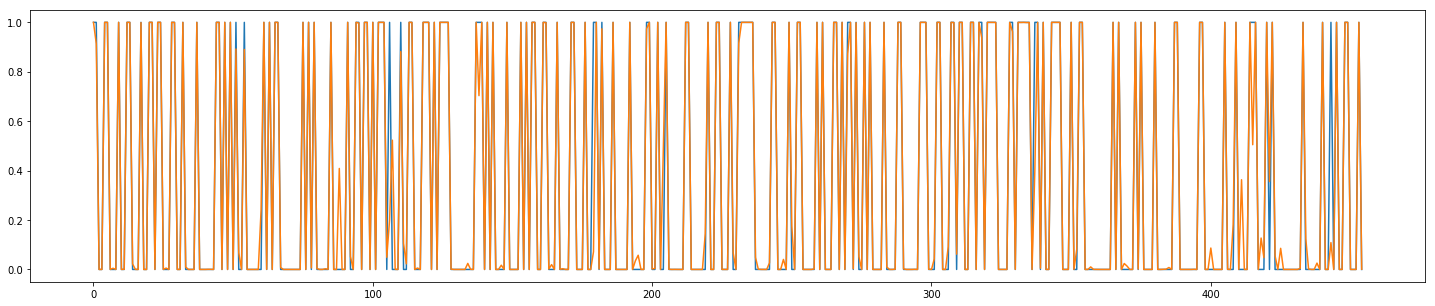

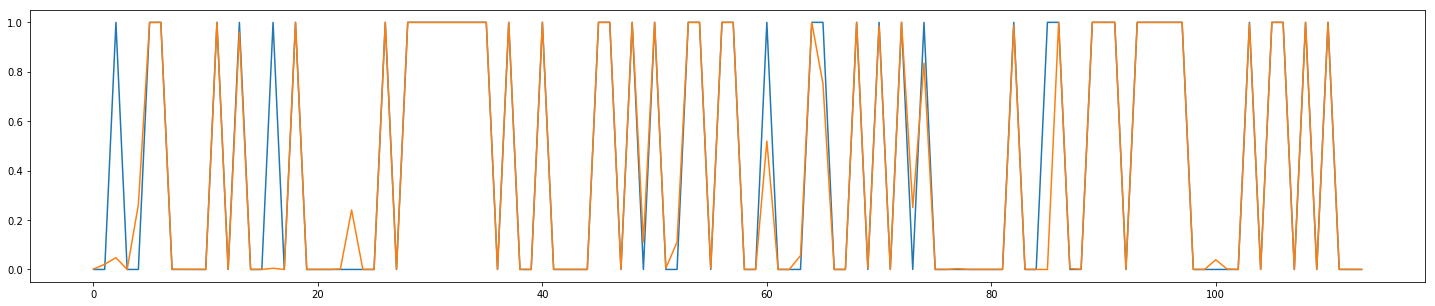

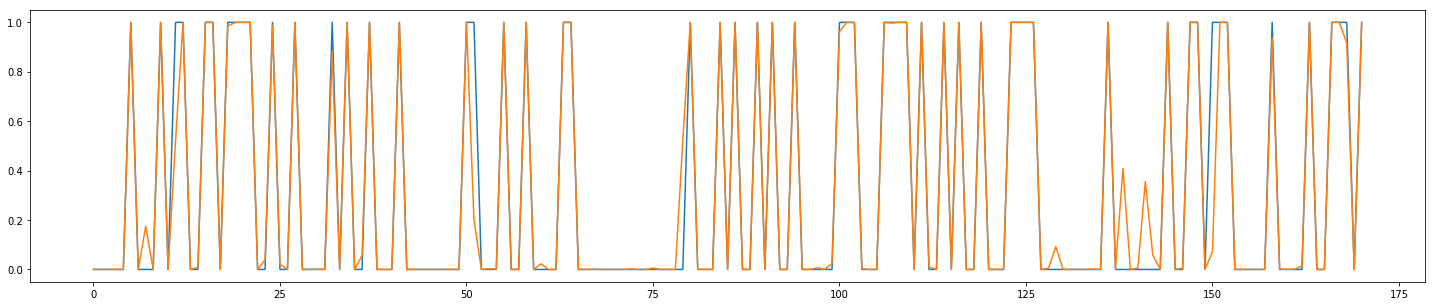

In [65]:
x = np.arange(0, len(y_train),1)
y_pred = model.predict(x_train)
plt.figure(figsize=(25, 5))
plt.plot(x, y_train, x , y_pred)

x = np.arange(0, len(y_val),1)
y_pred = model.predict(x_val)
plt.figure(figsize=(25, 5))
plt.plot(x, y_val, x , y_pred)

x = np.arange(0, len(y_test),1)
y_pred = model.predict(x_test)
plt.figure(figsize=(25, 5))
plt.plot(x, y_test, x , y_pred)

## Accuracy of traindata=98.9% , validation data = 97.3%, testing data =98,2% , for Learning rate = 0.1

## Case 4

In [79]:
optimizer = keras.optimizers.adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=3000, verbose=1, validation_data=(x_val, y_val))

Train on 455 samples, validate on 114 samples
Epoch 1/3000
455/455 [==============================] - 0s 767us/step - loss: 0.5182 - acc: 0.7868 - val_loss: 0.3381 - val_acc: 0.9123
Epoch 2/3000
455/455 [==============================] - 0s 158us/step - loss: 0.2908 - acc: 0.9165 - val_loss: 0.2459 - val_acc: 0.9211
Epoch 3/3000
455/455 [==============================] - 0s 142us/step - loss: 0.2275 - acc: 0.9165 - val_loss: 0.2202 - val_acc: 0.9123
Epoch 4/3000
455/455 [==============================] - 0s 131us/step - loss: 0.1971 - acc: 0.9363 - val_loss: 0.2266 - val_acc: 0.9035
Epoch 5/3000
455/455 [==============================] - 0s 153us/step - loss: 0.1814 - acc: 0.9473 - val_loss: 0.2013 - val_acc: 0.9123
Epoch 6/3000
455/455 [==============================] - 0s 159us/step - loss: 0.1615 - acc: 0.9604 - val_loss: 0.1826 - val_acc: 0.9474
Epoch 7/3000
455/455 [==============================] - 0s 131us/step - loss: 0.1487 - acc: 0.9560 - val_loss: 0.1765 - val_acc: 0.9386
Ep

455/455 [==============================] - 0s 125us/step - loss: 0.0559 - acc: 0.9890 - val_loss: 0.0921 - val_acc: 0.9561
Epoch 61/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0565 - acc: 0.9868 - val_loss: 0.0936 - val_acc: 0.9474
Epoch 62/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0558 - acc: 0.9890 - val_loss: 0.0911 - val_acc: 0.9561
Epoch 63/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0560 - acc: 0.9912 - val_loss: 0.0945 - val_acc: 0.9737
Epoch 64/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0563 - acc: 0.9890 - val_loss: 0.0931 - val_acc: 0.9561
Epoch 65/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0555 - acc: 0.9868 - val_loss: 0.0924 - val_acc: 0.9561
Epoch 66/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0605 - acc: 0.9824 - val_loss: 0.0951 - val_acc: 0.9737
Epoch 67/3000
455/455 [==============================] 

Epoch 120/3000
455/455 [==============================] - 0s 245us/step - loss: 0.0456 - acc: 0.9912 - val_loss: 0.0968 - val_acc: 0.9737
Epoch 121/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0465 - acc: 0.9868 - val_loss: 0.0943 - val_acc: 0.9474
Epoch 122/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0460 - acc: 0.9890 - val_loss: 0.0954 - val_acc: 0.9737
Epoch 123/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0468 - acc: 0.9868 - val_loss: 0.0961 - val_acc: 0.9474
Epoch 124/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0457 - acc: 0.9912 - val_loss: 0.0966 - val_acc: 0.9737
Epoch 125/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0502 - acc: 0.9912 - val_loss: 0.0974 - val_acc: 0.9474
Epoch 126/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0474 - acc: 0.9912 - val_loss: 0.0939 - val_acc: 0.9474
Epoch 127/3000
455/455 [==========

455/455 [==============================] - 0s 107us/step - loss: 0.0433 - acc: 0.9912 - val_loss: 0.1052 - val_acc: 0.9561
Epoch 180/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0452 - acc: 0.9846 - val_loss: 0.1029 - val_acc: 0.9649
Epoch 181/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0418 - acc: 0.9934 - val_loss: 0.0997 - val_acc: 0.9474
Epoch 182/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0409 - acc: 0.9934 - val_loss: 0.1033 - val_acc: 0.9737
Epoch 183/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0427 - acc: 0.9868 - val_loss: 0.0983 - val_acc: 0.9474
Epoch 184/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0432 - acc: 0.9890 - val_loss: 0.0942 - val_acc: 0.9649
Epoch 185/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0423 - acc: 0.9912 - val_loss: 0.0936 - val_acc: 0.9474
Epoch 186/3000
455/455 [=========================

455/455 [==============================] - 0s 112us/step - loss: 0.0399 - acc: 0.9868 - val_loss: 0.1061 - val_acc: 0.9561
Epoch 239/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0396 - acc: 0.9868 - val_loss: 0.1158 - val_acc: 0.9737
Epoch 240/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0417 - acc: 0.9868 - val_loss: 0.1084 - val_acc: 0.9649
Epoch 241/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0394 - acc: 0.9890 - val_loss: 0.1069 - val_acc: 0.9561
Epoch 242/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0397 - acc: 0.9868 - val_loss: 0.1103 - val_acc: 0.9737
Epoch 243/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0403 - acc: 0.9912 - val_loss: 0.1078 - val_acc: 0.9561
Epoch 244/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0409 - acc: 0.9890 - val_loss: 0.1140 - val_acc: 0.9737
Epoch 245/3000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0419 - acc: 0.9846 - val_loss: 0.1150 - val_acc: 0.9561
Epoch 298/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0390 - acc: 0.9846 - val_loss: 0.1275 - val_acc: 0.9737
Epoch 299/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0427 - acc: 0.9846 - val_loss: 0.1171 - val_acc: 0.9561
Epoch 300/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0426 - acc: 0.9824 - val_loss: 0.1313 - val_acc: 0.9737
Epoch 301/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0401 - acc: 0.9890 - val_loss: 0.1261 - val_acc: 0.9649
Epoch 302/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0383 - acc: 0.9868 - val_loss: 0.1180 - val_acc: 0.9561
Epoch 303/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0379 - acc: 0.9868 - val_loss: 0.1306 - val_acc: 0.9737
Epoch 304/3000
455/455 [=========================

455/455 [==============================] - 0s 121us/step - loss: 0.0375 - acc: 0.9868 - val_loss: 0.1343 - val_acc: 0.9737
Epoch 357/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0421 - acc: 0.9824 - val_loss: 0.1246 - val_acc: 0.9561
Epoch 358/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0374 - acc: 0.9890 - val_loss: 0.1268 - val_acc: 0.9649
Epoch 359/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0358 - acc: 0.9890 - val_loss: 0.1247 - val_acc: 0.9649
Epoch 360/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0398 - acc: 0.9890 - val_loss: 0.1174 - val_acc: 0.9561
Epoch 361/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0375 - acc: 0.9890 - val_loss: 0.1246 - val_acc: 0.9737
Epoch 362/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0384 - acc: 0.9912 - val_loss: 0.1172 - val_acc: 0.9649
Epoch 363/3000
455/455 [=========================

455/455 [==============================] - 0s 105us/step - loss: 0.0370 - acc: 0.9890 - val_loss: 0.1392 - val_acc: 0.9649
Epoch 416/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0386 - acc: 0.9868 - val_loss: 0.1293 - val_acc: 0.9649
Epoch 417/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0368 - acc: 0.9868 - val_loss: 0.1278 - val_acc: 0.9561
Epoch 418/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0378 - acc: 0.9868 - val_loss: 0.1271 - val_acc: 0.9561
Epoch 419/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0367 - acc: 0.9890 - val_loss: 0.1260 - val_acc: 0.9561
Epoch 420/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0438 - acc: 0.9912 - val_loss: 0.1475 - val_acc: 0.9649
Epoch 421/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0393 - acc: 0.9890 - val_loss: 0.1388 - val_acc: 0.9649
Epoch 422/3000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0383 - acc: 0.9846 - val_loss: 0.1384 - val_acc: 0.9649
Epoch 475/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0365 - acc: 0.9912 - val_loss: 0.1805 - val_acc: 0.9649
Epoch 476/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0407 - acc: 0.9824 - val_loss: 0.1378 - val_acc: 0.9649
Epoch 477/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0355 - acc: 0.9868 - val_loss: 0.1430 - val_acc: 0.9561
Epoch 478/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.1382 - val_acc: 0.9561
Epoch 479/3000
455/455 [==============================] - 0s 142us/step - loss: 0.0346 - acc: 0.9912 - val_loss: 0.1476 - val_acc: 0.9561
Epoch 480/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0350 - acc: 0.9890 - val_loss: 0.1425 - val_acc: 0.9561
Epoch 481/3000
455/455 [=========================

455/455 [==============================] - 0s 116us/step - loss: 0.0355 - acc: 0.9868 - val_loss: 0.1435 - val_acc: 0.9649
Epoch 534/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0344 - acc: 0.9912 - val_loss: 0.1593 - val_acc: 0.9649
Epoch 535/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0353 - acc: 0.9868 - val_loss: 0.1406 - val_acc: 0.9649
Epoch 536/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.1541 - val_acc: 0.9649
Epoch 537/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0373 - acc: 0.9912 - val_loss: 0.1429 - val_acc: 0.9561
Epoch 538/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0336 - acc: 0.9868 - val_loss: 0.1570 - val_acc: 0.9649
Epoch 539/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0339 - acc: 0.9868 - val_loss: 0.1434 - val_acc: 0.9649
Epoch 540/3000
455/455 [=========================

455/455 [==============================] - 0s 125us/step - loss: 0.0330 - acc: 0.9868 - val_loss: 0.1580 - val_acc: 0.9561
Epoch 593/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0352 - acc: 0.9890 - val_loss: 0.1505 - val_acc: 0.9561
Epoch 594/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0328 - acc: 0.9868 - val_loss: 0.1637 - val_acc: 0.9649
Epoch 595/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.1486 - val_acc: 0.9649
Epoch 596/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0329 - acc: 0.9890 - val_loss: 0.1620 - val_acc: 0.9649
Epoch 597/3000
455/455 [==============================] - 0s 132us/step - loss: 0.0336 - acc: 0.9890 - val_loss: 0.1533 - val_acc: 0.9561
Epoch 598/3000
455/455 [==============================] - 0s 145us/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.1474 - val_acc: 0.9649
Epoch 599/3000
455/455 [=========================

455/455 [==============================] - 0s 147us/step - loss: 0.0432 - acc: 0.9890 - val_loss: 0.1724 - val_acc: 0.9649
Epoch 652/3000
455/455 [==============================] - 0s 136us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.1514 - val_acc: 0.9561
Epoch 653/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0331 - acc: 0.9890 - val_loss: 0.1675 - val_acc: 0.9649
Epoch 654/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.1572 - val_acc: 0.9561
Epoch 655/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0319 - acc: 0.9890 - val_loss: 0.1655 - val_acc: 0.9649
Epoch 656/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0320 - acc: 0.9890 - val_loss: 0.1555 - val_acc: 0.9649
Epoch 657/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.1554 - val_acc: 0.9561
Epoch 658/3000
455/455 [=========================

455/455 [==============================] - 0s 103us/step - loss: 0.0330 - acc: 0.9912 - val_loss: 0.1515 - val_acc: 0.9649
Epoch 711/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0331 - acc: 0.9890 - val_loss: 0.1572 - val_acc: 0.9561
Epoch 712/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0313 - acc: 0.9890 - val_loss: 0.1553 - val_acc: 0.9474
Epoch 713/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0323 - acc: 0.9890 - val_loss: 0.1615 - val_acc: 0.9561
Epoch 714/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0322 - acc: 0.9890 - val_loss: 0.1643 - val_acc: 0.9649
Epoch 715/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0321 - acc: 0.9912 - val_loss: 0.1549 - val_acc: 0.9561
Epoch 716/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.1552 - val_acc: 0.9474
Epoch 717/3000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0325 - acc: 0.9890 - val_loss: 0.1558 - val_acc: 0.9474
Epoch 770/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0317 - acc: 0.9890 - val_loss: 0.1668 - val_acc: 0.9561
Epoch 771/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0331 - acc: 0.9868 - val_loss: 0.1577 - val_acc: 0.9561
Epoch 772/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0329 - acc: 0.9912 - val_loss: 0.1617 - val_acc: 0.9561
Epoch 773/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0310 - acc: 0.9890 - val_loss: 0.1620 - val_acc: 0.9561
Epoch 774/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0305 - acc: 0.9912 - val_loss: 0.1624 - val_acc: 0.9561
Epoch 775/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0318 - acc: 0.9890 - val_loss: 0.1837 - val_acc: 0.9649
Epoch 776/3000
455/455 [=========================

455/455 [==============================] - 0s 114us/step - loss: 0.0319 - acc: 0.9868 - val_loss: 0.1913 - val_acc: 0.9649
Epoch 829/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0353 - acc: 0.9868 - val_loss: 0.1620 - val_acc: 0.9649
Epoch 830/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0340 - acc: 0.9868 - val_loss: 0.1711 - val_acc: 0.9561
Epoch 831/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0350 - acc: 0.9890 - val_loss: 0.1691 - val_acc: 0.9561
Epoch 832/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0354 - acc: 0.9868 - val_loss: 0.1840 - val_acc: 0.9649
Epoch 833/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0315 - acc: 0.9868 - val_loss: 0.1707 - val_acc: 0.9561
Epoch 834/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0308 - acc: 0.9890 - val_loss: 0.1736 - val_acc: 0.9561
Epoch 835/3000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0324 - acc: 0.9868 - val_loss: 0.1640 - val_acc: 0.9561
Epoch 888/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0346 - acc: 0.9890 - val_loss: 0.1884 - val_acc: 0.9649
Epoch 889/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0308 - acc: 0.9890 - val_loss: 0.1759 - val_acc: 0.9561
Epoch 890/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0294 - acc: 0.9912 - val_loss: 0.1703 - val_acc: 0.9561
Epoch 891/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0338 - acc: 0.9868 - val_loss: 0.1790 - val_acc: 0.9561
Epoch 892/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0298 - acc: 0.9912 - val_loss: 0.1651 - val_acc: 0.9561
Epoch 893/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0384 - acc: 0.9824 - val_loss: 0.1786 - val_acc: 0.9561
Epoch 894/3000
455/455 [==========================

455/455 [==============================] - 0s 118us/step - loss: 0.0320 - acc: 0.9890 - val_loss: 0.1642 - val_acc: 0.9649
Epoch 947/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0348 - acc: 0.9868 - val_loss: 0.1744 - val_acc: 0.9561
Epoch 948/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0316 - acc: 0.9890 - val_loss: 0.1775 - val_acc: 0.9561
Epoch 949/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0322 - acc: 0.9868 - val_loss: 0.1757 - val_acc: 0.9474
Epoch 950/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0358 - acc: 0.9846 - val_loss: 0.1703 - val_acc: 0.9561
Epoch 951/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0313 - acc: 0.9868 - val_loss: 0.1900 - val_acc: 0.9649
Epoch 952/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0336 - acc: 0.9846 - val_loss: 0.1695 - val_acc: 0.9561
Epoch 953/3000
455/455 [=========================

455/455 [==============================] - 0s 107us/step - loss: 0.0297 - acc: 0.9890 - val_loss: 0.1789 - val_acc: 0.9561
Epoch 1006/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0290 - acc: 0.9868 - val_loss: 0.1879 - val_acc: 0.9649
Epoch 1007/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0288 - acc: 0.9890 - val_loss: 0.1749 - val_acc: 0.9561
Epoch 1008/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0296 - acc: 0.9912 - val_loss: 0.1743 - val_acc: 0.9649
Epoch 1009/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0296 - acc: 0.9890 - val_loss: 0.1815 - val_acc: 0.9561
Epoch 1010/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0290 - acc: 0.9890 - val_loss: 0.1985 - val_acc: 0.9649
Epoch 1011/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0304 - acc: 0.9868 - val_loss: 0.1875 - val_acc: 0.9561
Epoch 1012/3000
455/455 [==================

455/455 [==============================] - 0s 99us/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.1725 - val_acc: 0.9649
Epoch 1065/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0298 - acc: 0.9868 - val_loss: 0.1835 - val_acc: 0.9561
Epoch 1066/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.1854 - val_acc: 0.9561
Epoch 1067/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0286 - acc: 0.9912 - val_loss: 0.1817 - val_acc: 0.9561
Epoch 1068/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0322 - acc: 0.9868 - val_loss: 0.1712 - val_acc: 0.9561
Epoch 1069/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0335 - acc: 0.9890 - val_loss: 0.2007 - val_acc: 0.9649
Epoch 1070/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0309 - acc: 0.9868 - val_loss: 0.1883 - val_acc: 0.9561
Epoch 1071/3000
455/455 [====================

455/455 [==============================] - 0s 103us/step - loss: 0.0295 - acc: 0.9890 - val_loss: 0.1879 - val_acc: 0.9561
Epoch 1124/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0283 - acc: 0.9890 - val_loss: 0.1895 - val_acc: 0.9561
Epoch 1125/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0318 - acc: 0.9846 - val_loss: 0.1830 - val_acc: 0.9474
Epoch 1126/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.1964 - val_acc: 0.9561
Epoch 1127/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0286 - acc: 0.9912 - val_loss: 0.1866 - val_acc: 0.9561
Epoch 1128/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0283 - acc: 0.9890 - val_loss: 0.2006 - val_acc: 0.9649
Epoch 1129/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0285 - acc: 0.9890 - val_loss: 0.1924 - val_acc: 0.9561
Epoch 1130/3000
455/455 [===================

455/455 [==============================] - 0s 105us/step - loss: 0.0278 - acc: 0.9890 - val_loss: 0.1985 - val_acc: 0.9649
Epoch 1183/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.1929 - val_acc: 0.9561
Epoch 1184/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0299 - acc: 0.9868 - val_loss: 0.2232 - val_acc: 0.9649
Epoch 1185/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0307 - acc: 0.9890 - val_loss: 0.2038 - val_acc: 0.9561
Epoch 1186/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0276 - acc: 0.9868 - val_loss: 0.2032 - val_acc: 0.9561
Epoch 1187/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0281 - acc: 0.9868 - val_loss: 0.1975 - val_acc: 0.9561
Epoch 1188/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0281 - acc: 0.9890 - val_loss: 0.1968 - val_acc: 0.9561
Epoch 1189/3000
455/455 [==================

455/455 [==============================] - 0s 164us/step - loss: 0.0320 - acc: 0.9890 - val_loss: 0.1830 - val_acc: 0.9561
Epoch 1242/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0494 - acc: 0.9824 - val_loss: 0.2384 - val_acc: 0.9649
Epoch 1243/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0307 - acc: 0.9890 - val_loss: 0.1859 - val_acc: 0.9561
Epoch 1244/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0287 - acc: 0.9868 - val_loss: 0.2226 - val_acc: 0.9649
Epoch 1245/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0298 - acc: 0.9868 - val_loss: 0.1828 - val_acc: 0.9561
Epoch 1246/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0287 - acc: 0.9890 - val_loss: 0.2045 - val_acc: 0.9649
Epoch 1247/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0278 - acc: 0.9890 - val_loss: 0.1884 - val_acc: 0.9561
Epoch 1248/3000
455/455 [==================

455/455 [==============================] - 0s 107us/step - loss: 0.0291 - acc: 0.9890 - val_loss: 0.1935 - val_acc: 0.9561
Epoch 1301/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0287 - acc: 0.9846 - val_loss: 0.1947 - val_acc: 0.9561
Epoch 1302/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0274 - acc: 0.9890 - val_loss: 0.1973 - val_acc: 0.9561
Epoch 1303/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0278 - acc: 0.9890 - val_loss: 0.2094 - val_acc: 0.9561
Epoch 1304/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.2001 - val_acc: 0.9474
Epoch 1305/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0288 - acc: 0.9868 - val_loss: 0.2167 - val_acc: 0.9649
Epoch 1306/3000
455/455 [==============================] - 0s 132us/step - loss: 0.0277 - acc: 0.9868 - val_loss: 0.2017 - val_acc: 0.9561
Epoch 1307/3000
455/455 [==================

455/455 [==============================] - 0s 101us/step - loss: 0.0282 - acc: 0.9890 - val_loss: 0.2168 - val_acc: 0.9649
Epoch 1360/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0288 - acc: 0.9868 - val_loss: 0.1942 - val_acc: 0.9561
Epoch 1361/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0285 - acc: 0.9890 - val_loss: 0.2086 - val_acc: 0.9561
Epoch 1362/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0274 - acc: 0.9890 - val_loss: 0.2079 - val_acc: 0.9561
Epoch 1363/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0268 - acc: 0.9912 - val_loss: 0.2086 - val_acc: 0.9561
Epoch 1364/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0278 - acc: 0.9912 - val_loss: 0.2122 - val_acc: 0.9649
Epoch 1365/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0273 - acc: 0.9890 - val_loss: 0.2103 - val_acc: 0.9561
Epoch 1366/3000
455/455 [==================

455/455 [==============================] - 0s 107us/step - loss: 0.0266 - acc: 0.9890 - val_loss: 0.2229 - val_acc: 0.9649
Epoch 1419/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0265 - acc: 0.9890 - val_loss: 0.1998 - val_acc: 0.9561
Epoch 1420/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0271 - acc: 0.9912 - val_loss: 0.2133 - val_acc: 0.9561
Epoch 1421/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0281 - acc: 0.9890 - val_loss: 0.1982 - val_acc: 0.9561
Epoch 1422/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0284 - acc: 0.9868 - val_loss: 0.2323 - val_acc: 0.9649
Epoch 1423/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0280 - acc: 0.9868 - val_loss: 0.2027 - val_acc: 0.9561
Epoch 1424/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0264 - acc: 0.9912 - val_loss: 0.2352 - val_acc: 0.9649
Epoch 1425/3000
455/455 [==================

455/455 [==============================] - 0s 105us/step - loss: 0.0261 - acc: 0.9868 - val_loss: 0.2145 - val_acc: 0.9561
Epoch 1478/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0260 - acc: 0.9890 - val_loss: 0.2140 - val_acc: 0.9561
Epoch 1479/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0260 - acc: 0.9912 - val_loss: 0.2126 - val_acc: 0.9561
Epoch 1480/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0263 - acc: 0.9890 - val_loss: 0.2174 - val_acc: 0.9561
Epoch 1481/3000
455/455 [==============================] - 0s 174us/step - loss: 0.0262 - acc: 0.9890 - val_loss: 0.2091 - val_acc: 0.9561
Epoch 1482/3000
455/455 [==============================] - 0s 264us/step - loss: 0.0260 - acc: 0.9912 - val_loss: 0.2197 - val_acc: 0.9649
Epoch 1483/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0267 - acc: 0.9890 - val_loss: 0.2201 - val_acc: 0.9649
Epoch 1484/3000
455/455 [==================

455/455 [==============================] - 0s 125us/step - loss: 0.0257 - acc: 0.9890 - val_loss: 0.2137 - val_acc: 0.9561
Epoch 1537/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0267 - acc: 0.9890 - val_loss: 0.2354 - val_acc: 0.9649
Epoch 1538/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0264 - acc: 0.9912 - val_loss: 0.2224 - val_acc: 0.9649
Epoch 1539/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0257 - acc: 0.9890 - val_loss: 0.2199 - val_acc: 0.9649
Epoch 1540/3000
455/455 [==============================] - 0s 140us/step - loss: 0.0261 - acc: 0.9890 - val_loss: 0.2163 - val_acc: 0.9561
Epoch 1541/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.2168 - val_acc: 0.9561
Epoch 1542/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0259 - acc: 0.9890 - val_loss: 0.2234 - val_acc: 0.9649
Epoch 1543/3000
455/455 [==================

455/455 [==============================] - 0s 112us/step - loss: 0.0301 - acc: 0.9868 - val_loss: 0.2036 - val_acc: 0.9561
Epoch 1596/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0326 - acc: 0.9846 - val_loss: 0.2172 - val_acc: 0.9561
Epoch 1597/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0337 - acc: 0.9846 - val_loss: 0.2404 - val_acc: 0.9649
Epoch 1598/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0285 - acc: 0.9890 - val_loss: 0.2324 - val_acc: 0.9649
Epoch 1599/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0263 - acc: 0.9912 - val_loss: 0.2325 - val_acc: 0.9649
Epoch 1600/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0271 - acc: 0.9890 - val_loss: 0.2275 - val_acc: 0.9649
Epoch 1601/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0333 - acc: 0.9890 - val_loss: 0.2005 - val_acc: 0.9561
Epoch 1602/3000
455/455 [===================

455/455 [==============================] - 0s 105us/step - loss: 0.0276 - acc: 0.9912 - val_loss: 0.2239 - val_acc: 0.9649
Epoch 1655/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0261 - acc: 0.9890 - val_loss: 0.2181 - val_acc: 0.9561
Epoch 1656/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0271 - acc: 0.9912 - val_loss: 0.2217 - val_acc: 0.9649
Epoch 1657/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0269 - acc: 0.9890 - val_loss: 0.2138 - val_acc: 0.9561
Epoch 1658/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0278 - acc: 0.9890 - val_loss: 0.2227 - val_acc: 0.9649
Epoch 1659/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0252 - acc: 0.9912 - val_loss: 0.2108 - val_acc: 0.9561
Epoch 1660/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0258 - acc: 0.9890 - val_loss: 0.2252 - val_acc: 0.9649
Epoch 1661/3000
455/455 [===================

455/455 [==============================] - 0s 103us/step - loss: 0.0258 - acc: 0.9890 - val_loss: 0.2230 - val_acc: 0.9561
Epoch 1714/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0272 - acc: 0.9846 - val_loss: 0.2299 - val_acc: 0.9649
Epoch 1715/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0250 - acc: 0.9912 - val_loss: 0.2165 - val_acc: 0.9561
Epoch 1716/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0264 - acc: 0.9890 - val_loss: 0.2130 - val_acc: 0.9561
Epoch 1717/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0262 - acc: 0.9912 - val_loss: 0.2389 - val_acc: 0.9649
Epoch 1718/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0330 - acc: 0.9868 - val_loss: 0.2092 - val_acc: 0.9561
Epoch 1719/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0289 - acc: 0.9912 - val_loss: 0.2410 - val_acc: 0.9649
Epoch 1720/3000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0262 - acc: 0.9890 - val_loss: 0.2294 - val_acc: 0.9649
Epoch 1773/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0259 - acc: 0.9890 - val_loss: 0.2215 - val_acc: 0.9561
Epoch 1774/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0260 - acc: 0.9912 - val_loss: 0.2310 - val_acc: 0.9649
Epoch 1775/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0257 - acc: 0.9912 - val_loss: 0.2227 - val_acc: 0.9561
Epoch 1776/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0261 - acc: 0.9912 - val_loss: 0.2257 - val_acc: 0.9561
Epoch 1777/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0252 - acc: 0.9890 - val_loss: 0.2309 - val_acc: 0.9649
Epoch 1778/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0276 - acc: 0.9890 - val_loss: 0.2299 - val_acc: 0.9649
Epoch 1779/3000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0342 - acc: 0.9890 - val_loss: 0.2075 - val_acc: 0.9561
Epoch 1832/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0291 - acc: 0.9890 - val_loss: 0.2293 - val_acc: 0.9649
Epoch 1833/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0259 - acc: 0.9912 - val_loss: 0.2202 - val_acc: 0.9561
Epoch 1834/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0251 - acc: 0.9912 - val_loss: 0.2241 - val_acc: 0.9561
Epoch 1835/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0262 - acc: 0.9890 - val_loss: 0.2306 - val_acc: 0.9649
Epoch 1836/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0253 - acc: 0.9912 - val_loss: 0.2279 - val_acc: 0.9649
Epoch 1837/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0262 - acc: 0.9890 - val_loss: 0.2246 - val_acc: 0.9561
Epoch 1838/3000
455/455 [====================

455/455 [==============================] - 0s 103us/step - loss: 0.0263 - acc: 0.9868 - val_loss: 0.2264 - val_acc: 0.9649
Epoch 1891/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0252 - acc: 0.9890 - val_loss: 0.2204 - val_acc: 0.9561
Epoch 1892/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0262 - acc: 0.9890 - val_loss: 0.2329 - val_acc: 0.9649
Epoch 1893/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0252 - acc: 0.9890 - val_loss: 0.2273 - val_acc: 0.9649
Epoch 1894/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0251 - acc: 0.9912 - val_loss: 0.2371 - val_acc: 0.9649
Epoch 1895/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0249 - acc: 0.9912 - val_loss: 0.2238 - val_acc: 0.9561
Epoch 1896/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0252 - acc: 0.9890 - val_loss: 0.2298 - val_acc: 0.9649
Epoch 1897/3000
455/455 [==================

455/455 [==============================] - 0s 116us/step - loss: 0.0246 - acc: 0.9912 - val_loss: 0.2402 - val_acc: 0.9649
Epoch 1950/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0242 - acc: 0.9868 - val_loss: 0.2296 - val_acc: 0.9561
Epoch 1951/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0245 - acc: 0.9912 - val_loss: 0.2314 - val_acc: 0.9561
Epoch 1952/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0259 - acc: 0.9868 - val_loss: 0.2332 - val_acc: 0.9649
Epoch 1953/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0269 - acc: 0.9868 - val_loss: 0.2395 - val_acc: 0.9649
Epoch 1954/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0252 - acc: 0.9890 - val_loss: 0.2231 - val_acc: 0.9561
Epoch 1955/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0266 - acc: 0.9890 - val_loss: 0.2369 - val_acc: 0.9649
Epoch 1956/3000
455/455 [====================

455/455 [==============================] - 0s 121us/step - loss: 0.0265 - acc: 0.9890 - val_loss: 0.2409 - val_acc: 0.9649
Epoch 2009/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0290 - acc: 0.9868 - val_loss: 0.2227 - val_acc: 0.9649
Epoch 2010/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0255 - acc: 0.9912 - val_loss: 0.2390 - val_acc: 0.9649
Epoch 2011/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0251 - acc: 0.9890 - val_loss: 0.2288 - val_acc: 0.9561
Epoch 2012/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0251 - acc: 0.9890 - val_loss: 0.2329 - val_acc: 0.9649
Epoch 2013/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0274 - acc: 0.9912 - val_loss: 0.2309 - val_acc: 0.9561
Epoch 2014/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0260 - acc: 0.9890 - val_loss: 0.2323 - val_acc: 0.9649
Epoch 2015/3000
455/455 [==================

455/455 [==============================] - 0s 105us/step - loss: 0.0242 - acc: 0.9890 - val_loss: 0.2342 - val_acc: 0.9561
Epoch 2068/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0248 - acc: 0.9868 - val_loss: 0.2419 - val_acc: 0.9649
Epoch 2069/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0254 - acc: 0.9912 - val_loss: 0.2341 - val_acc: 0.9649
Epoch 2070/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0271 - acc: 0.9868 - val_loss: 0.2457 - val_acc: 0.9649
Epoch 2071/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0339 - acc: 0.9846 - val_loss: 0.2227 - val_acc: 0.9561
Epoch 2072/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0303 - acc: 0.9912 - val_loss: 0.2442 - val_acc: 0.9649
Epoch 2073/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0245 - acc: 0.9890 - val_loss: 0.2154 - val_acc: 0.9649
Epoch 2074/3000
455/455 [==================

455/455 [==============================] - 0s 105us/step - loss: 0.0252 - acc: 0.9890 - val_loss: 0.2343 - val_acc: 0.9649
Epoch 2127/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0248 - acc: 0.9890 - val_loss: 0.2398 - val_acc: 0.9649
Epoch 2128/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0241 - acc: 0.9890 - val_loss: 0.2341 - val_acc: 0.9649
Epoch 2129/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0263 - acc: 0.9912 - val_loss: 0.2336 - val_acc: 0.9561
Epoch 2130/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0247 - acc: 0.9890 - val_loss: 0.2387 - val_acc: 0.9649
Epoch 2131/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0234 - acc: 0.9890 - val_loss: 0.2355 - val_acc: 0.9649
Epoch 2132/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0251 - acc: 0.9868 - val_loss: 0.2323 - val_acc: 0.9561
Epoch 2133/3000
455/455 [===================

455/455 [==============================] - 0s 105us/step - loss: 0.0268 - acc: 0.9890 - val_loss: 0.2310 - val_acc: 0.9561
Epoch 2186/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0275 - acc: 0.9868 - val_loss: 0.2451 - val_acc: 0.9649
Epoch 2187/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0260 - acc: 0.9868 - val_loss: 0.2392 - val_acc: 0.9649
Epoch 2188/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0258 - acc: 0.9890 - val_loss: 0.2513 - val_acc: 0.9649
Epoch 2189/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0248 - acc: 0.9868 - val_loss: 0.2251 - val_acc: 0.9561
Epoch 2190/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0259 - acc: 0.9912 - val_loss: 0.2360 - val_acc: 0.9649
Epoch 2191/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0278 - acc: 0.9890 - val_loss: 0.2518 - val_acc: 0.9649
Epoch 2192/3000
455/455 [==================

455/455 [==============================] - 0s 114us/step - loss: 0.0251 - acc: 0.9890 - val_loss: 0.2378 - val_acc: 0.9649
Epoch 2245/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0240 - acc: 0.9890 - val_loss: 0.2454 - val_acc: 0.9649
Epoch 2246/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0245 - acc: 0.9890 - val_loss: 0.2356 - val_acc: 0.9561
Epoch 2247/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0235 - acc: 0.9912 - val_loss: 0.2442 - val_acc: 0.9649
Epoch 2248/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0255 - acc: 0.9912 - val_loss: 0.2371 - val_acc: 0.9649
Epoch 2249/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0235 - acc: 0.9890 - val_loss: 0.2370 - val_acc: 0.9649
Epoch 2250/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0232 - acc: 0.9912 - val_loss: 0.2444 - val_acc: 0.9649
Epoch 2251/3000
455/455 [===================

455/455 [==============================] - 0s 105us/step - loss: 0.0259 - acc: 0.9846 - val_loss: 0.2448 - val_acc: 0.9649
Epoch 2304/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0273 - acc: 0.9868 - val_loss: 0.2517 - val_acc: 0.9649
Epoch 2305/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0243 - acc: 0.9890 - val_loss: 0.2344 - val_acc: 0.9561
Epoch 2306/3000
455/455 [==============================] - 0s 149us/step - loss: 0.0259 - acc: 0.9912 - val_loss: 0.2431 - val_acc: 0.9649
Epoch 2307/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0239 - acc: 0.9868 - val_loss: 0.2355 - val_acc: 0.9561
Epoch 2308/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0231 - acc: 0.9890 - val_loss: 0.2452 - val_acc: 0.9649
Epoch 2309/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0233 - acc: 0.9912 - val_loss: 0.2336 - val_acc: 0.9561
Epoch 2310/3000
455/455 [==================

455/455 [==============================] - 0s 105us/step - loss: 0.0276 - acc: 0.9890 - val_loss: 0.2426 - val_acc: 0.9649
Epoch 2363/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0248 - acc: 0.9890 - val_loss: 0.2451 - val_acc: 0.9649
Epoch 2364/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0232 - acc: 0.9912 - val_loss: 0.2382 - val_acc: 0.9561
Epoch 2365/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0234 - acc: 0.9890 - val_loss: 0.2456 - val_acc: 0.9649
Epoch 2366/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0251 - acc: 0.9868 - val_loss: 0.2409 - val_acc: 0.9649
Epoch 2367/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0282 - acc: 0.9868 - val_loss: 0.2507 - val_acc: 0.9649
Epoch 2368/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0256 - acc: 0.9890 - val_loss: 0.2400 - val_acc: 0.9649
Epoch 2369/3000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0230 - acc: 0.9890 - val_loss: 0.2454 - val_acc: 0.9649
Epoch 2422/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0232 - acc: 0.9890 - val_loss: 0.2412 - val_acc: 0.9649
Epoch 2423/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0235 - acc: 0.9890 - val_loss: 0.2392 - val_acc: 0.9561
Epoch 2424/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0233 - acc: 0.9890 - val_loss: 0.2463 - val_acc: 0.9649
Epoch 2425/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0253 - acc: 0.9890 - val_loss: 0.2360 - val_acc: 0.9561
Epoch 2426/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0259 - acc: 0.9868 - val_loss: 0.2548 - val_acc: 0.9649
Epoch 2427/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0241 - acc: 0.9890 - val_loss: 0.2428 - val_acc: 0.9649
Epoch 2428/3000
455/455 [==================

455/455 [==============================] - 0s 107us/step - loss: 0.0246 - acc: 0.9890 - val_loss: 0.2410 - val_acc: 0.9649
Epoch 2481/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0235 - acc: 0.9890 - val_loss: 0.2464 - val_acc: 0.9649
Epoch 2482/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0247 - acc: 0.9934 - val_loss: 0.2448 - val_acc: 0.9649
Epoch 2483/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0267 - acc: 0.9890 - val_loss: 0.2275 - val_acc: 0.9561
Epoch 2484/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0306 - acc: 0.9912 - val_loss: 0.2569 - val_acc: 0.9649
Epoch 2485/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0234 - acc: 0.9890 - val_loss: 0.2325 - val_acc: 0.9561
Epoch 2486/3000
455/455 [==============================] - 0s 101us/step - loss: 0.0256 - acc: 0.9868 - val_loss: 0.2484 - val_acc: 0.9649
Epoch 2487/3000
455/455 [==================

455/455 [==============================] - 0s 134us/step - loss: 0.0309 - acc: 0.9890 - val_loss: 0.2344 - val_acc: 0.9561
Epoch 2540/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0277 - acc: 0.9890 - val_loss: 0.2479 - val_acc: 0.9649
Epoch 2541/3000
455/455 [==============================] - 0s 129us/step - loss: 0.0272 - acc: 0.9890 - val_loss: 0.2450 - val_acc: 0.9649
Epoch 2542/3000
455/455 [==============================] - 0s 125us/step - loss: 0.0224 - acc: 0.9912 - val_loss: 0.2428 - val_acc: 0.9649
Epoch 2543/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0228 - acc: 0.9890 - val_loss: 0.2444 - val_acc: 0.9649
Epoch 2544/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0243 - acc: 0.9912 - val_loss: 0.2397 - val_acc: 0.9561
Epoch 2545/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0231 - acc: 0.9890 - val_loss: 0.2426 - val_acc: 0.9649
Epoch 2546/3000
455/455 [==================

455/455 [==============================] - 0s 103us/step - loss: 0.0265 - acc: 0.9912 - val_loss: 0.2404 - val_acc: 0.9649
Epoch 2599/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0310 - acc: 0.9868 - val_loss: 0.2414 - val_acc: 0.9649
Epoch 2600/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0247 - acc: 0.9912 - val_loss: 0.2423 - val_acc: 0.9649
Epoch 2601/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0232 - acc: 0.9912 - val_loss: 0.2343 - val_acc: 0.9561
Epoch 2602/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0235 - acc: 0.9890 - val_loss: 0.2487 - val_acc: 0.9649
Epoch 2603/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0235 - acc: 0.9912 - val_loss: 0.2428 - val_acc: 0.9649
Epoch 2604/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0232 - acc: 0.9912 - val_loss: 0.2407 - val_acc: 0.9649
Epoch 2605/3000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0301 - acc: 0.9868 - val_loss: 0.2458 - val_acc: 0.9649
Epoch 2658/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0248 - acc: 0.9912 - val_loss: 0.2409 - val_acc: 0.9561
Epoch 2659/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0225 - acc: 0.9890 - val_loss: 0.2494 - val_acc: 0.9649
Epoch 2660/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0238 - acc: 0.9890 - val_loss: 0.2372 - val_acc: 0.9561
Epoch 2661/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0237 - acc: 0.9912 - val_loss: 0.2506 - val_acc: 0.9649
Epoch 2662/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0248 - acc: 0.9890 - val_loss: 0.2381 - val_acc: 0.9561
Epoch 2663/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0245 - acc: 0.9890 - val_loss: 0.2448 - val_acc: 0.9649
Epoch 2664/3000
455/455 [==================

455/455 [==============================] - 0s 147us/step - loss: 0.0236 - acc: 0.9912 - val_loss: 0.2432 - val_acc: 0.9561
Epoch 2717/3000
455/455 [==============================] - 0s 145us/step - loss: 0.0287 - acc: 0.9890 - val_loss: 0.2513 - val_acc: 0.9649
Epoch 2718/3000
455/455 [==============================] - 0s 153us/step - loss: 0.0255 - acc: 0.9890 - val_loss: 0.2512 - val_acc: 0.9649
Epoch 2719/3000
455/455 [==============================] - 0s 134us/step - loss: 0.0234 - acc: 0.9890 - val_loss: 0.2523 - val_acc: 0.9649
Epoch 2720/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0225 - acc: 0.9890 - val_loss: 0.2532 - val_acc: 0.9649
Epoch 2721/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0228 - acc: 0.9890 - val_loss: 0.2499 - val_acc: 0.9649
Epoch 2722/3000
455/455 [==============================] - 0s 145us/step - loss: 0.0224 - acc: 0.9912 - val_loss: 0.2559 - val_acc: 0.9649
Epoch 2723/3000
455/455 [==================

455/455 [==============================] - 0s 110us/step - loss: 0.0223 - acc: 0.9890 - val_loss: 0.2576 - val_acc: 0.9649
Epoch 2776/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0233 - acc: 0.9912 - val_loss: 0.2489 - val_acc: 0.9649
Epoch 2777/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0234 - acc: 0.9890 - val_loss: 0.2503 - val_acc: 0.9649
Epoch 2778/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0229 - acc: 0.9912 - val_loss: 0.2527 - val_acc: 0.9649
Epoch 2779/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0261 - acc: 0.9890 - val_loss: 0.2557 - val_acc: 0.9649
Epoch 2780/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0229 - acc: 0.9890 - val_loss: 0.2455 - val_acc: 0.9649
Epoch 2781/3000
455/455 [==============================] - 0s 110us/step - loss: 0.0230 - acc: 0.9912 - val_loss: 0.2492 - val_acc: 0.9649
Epoch 2782/3000
455/455 [===================

455/455 [==============================] - 0s 127us/step - loss: 0.0237 - acc: 0.9890 - val_loss: 0.2678 - val_acc: 0.9649
Epoch 2835/3000
455/455 [==============================] - 0s 333us/step - loss: 0.0258 - acc: 0.9934 - val_loss: 0.2471 - val_acc: 0.9649
Epoch 2836/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0222 - acc: 0.9912 - val_loss: 0.2435 - val_acc: 0.9561
Epoch 2837/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0223 - acc: 0.9890 - val_loss: 0.2498 - val_acc: 0.9649
Epoch 2838/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0241 - acc: 0.9912 - val_loss: 0.2428 - val_acc: 0.9561
Epoch 2839/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0229 - acc: 0.9934 - val_loss: 0.2475 - val_acc: 0.9649
Epoch 2840/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0233 - acc: 0.9868 - val_loss: 0.2514 - val_acc: 0.9649
Epoch 2841/3000
455/455 [==================

455/455 [==============================] - 0s 114us/step - loss: 0.0223 - acc: 0.9912 - val_loss: 0.2480 - val_acc: 0.9649
Epoch 2894/3000
455/455 [==============================] - 0s 123us/step - loss: 0.0221 - acc: 0.9912 - val_loss: 0.2456 - val_acc: 0.9649
Epoch 2895/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0222 - acc: 0.9912 - val_loss: 0.2568 - val_acc: 0.9649
Epoch 2896/3000
455/455 [==============================] - 0s 112us/step - loss: 0.0247 - acc: 0.9912 - val_loss: 0.2427 - val_acc: 0.9561
Epoch 2897/3000
455/455 [==============================] - 0s 107us/step - loss: 0.0233 - acc: 0.9890 - val_loss: 0.2637 - val_acc: 0.9649
Epoch 2898/3000
455/455 [==============================] - 0s 103us/step - loss: 0.0242 - acc: 0.9912 - val_loss: 0.2529 - val_acc: 0.9649
Epoch 2899/3000
455/455 [==============================] - 0s 99us/step - loss: 0.0222 - acc: 0.9890 - val_loss: 0.2493 - val_acc: 0.9649
Epoch 2900/3000
455/455 [===================

455/455 [==============================] - 0s 129us/step - loss: 0.0257 - acc: 0.9868 - val_loss: 0.2473 - val_acc: 0.9561
Epoch 2953/3000
455/455 [==============================] - 0s 118us/step - loss: 0.0234 - acc: 0.9868 - val_loss: 0.2556 - val_acc: 0.9649
Epoch 2954/3000
455/455 [==============================] - 0s 116us/step - loss: 0.0222 - acc: 0.9912 - val_loss: 0.2485 - val_acc: 0.9649
Epoch 2955/3000
455/455 [==============================] - 0s 127us/step - loss: 0.0227 - acc: 0.9912 - val_loss: 0.2485 - val_acc: 0.9649
Epoch 2956/3000
455/455 [==============================] - 0s 105us/step - loss: 0.0227 - acc: 0.9912 - val_loss: 0.2504 - val_acc: 0.9649
Epoch 2957/3000
455/455 [==============================] - 0s 114us/step - loss: 0.0226 - acc: 0.9890 - val_loss: 0.2472 - val_acc: 0.9649
Epoch 2958/3000
455/455 [==============================] - 0s 121us/step - loss: 0.0230 - acc: 0.9912 - val_loss: 0.2541 - val_acc: 0.9649
Epoch 2959/3000
455/455 [==================

In [80]:
score_train, score_valid,score_test = loss_eval(x_train, y_train, x_val, y_val,x_test,y_test, 128)
print(score_train, score_valid,score_test)

171/171 [==============================] - 0s 29us/step
[0.021256273477287084, 0.9934065934065934] [0.24817264080047607, 0.9649122953414917] [0.12261968798804701, 0.98830409077873]


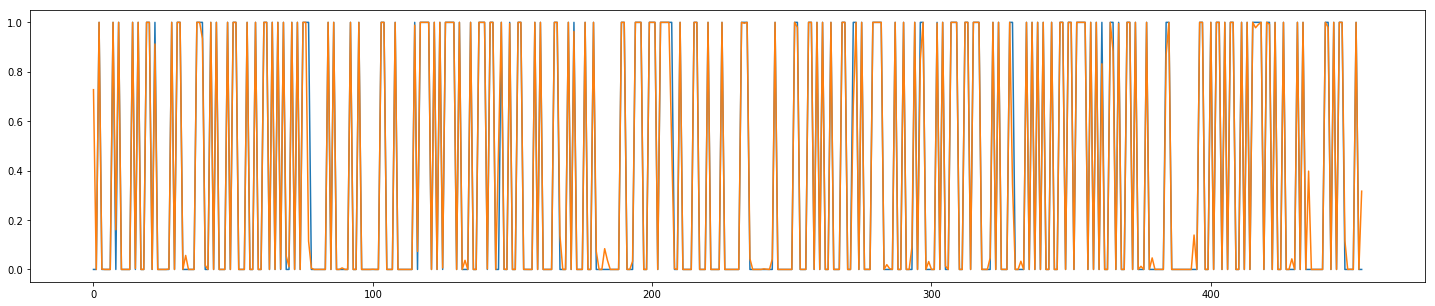

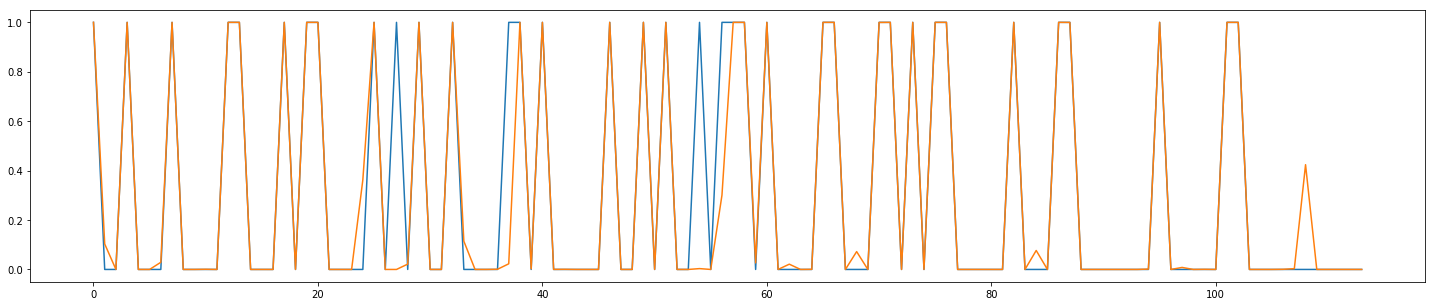

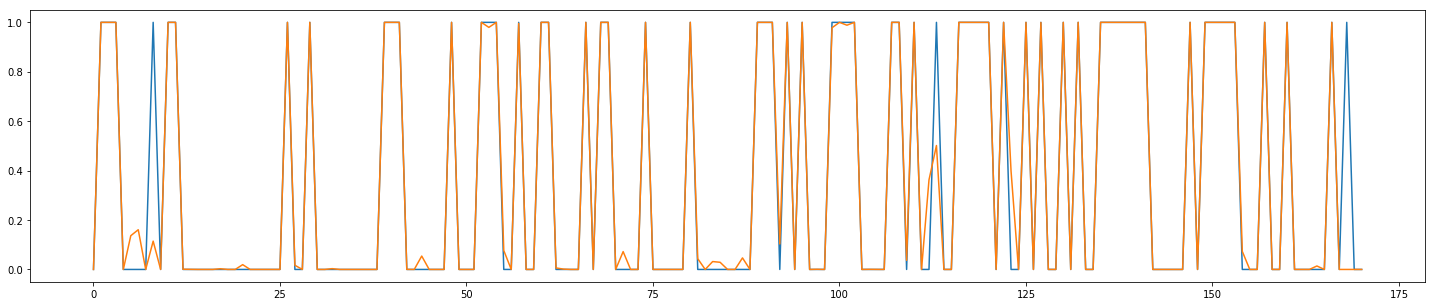

In [81]:
x = np.arange(0, len(y_train),1)
y_pred = model.predict(x_train)
plt.figure(figsize=(25, 5))
plt.plot(x, y_train, x , y_pred)

x = np.arange(0, len(y_val),1)
y_pred = model.predict(x_val)
plt.figure(figsize=(25, 5))
plt.plot(x, y_val, x , y_pred)

x = np.arange(0, len(y_test),1)
y_pred = model.predict(x_test)
plt.figure(figsize=(25, 5))
plt.plot(x, y_test, x , y_pred)

### Accuracy of traindata = 99.3%, validation data =96.4% , testing data = 98.4%, for Learning rate = 1

## Therefore, 
## we got our best Accuracy for the learnig rate = 0.01, with  and with Accuracy of traindata = 98.6%, validation data =99.1% , testing data = 98.83%  the following weights: Number of iterations for convergence

In [82]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)

[array([[-11.996972 ],
       [  4.2654915],
       [ -3.2785363],
       [ 19.9696   ],
       [  7.147634 ],
       [-65.129265 ],
       [ 52.179523 ],
       [ 11.5815   ],
       [ -3.9817936],
       [ 17.499846 ],
       [ 73.74296  ],
       [-20.24966  ],
       [ -8.411198 ],
       [ 71.961494 ],
       [  4.2543197],
       [-15.279733 ],
       [-54.83192  ],
       [ 42.975132 ],
       [-29.588985 ],
       [-26.232069 ],
       [  3.5325522],
       [ 27.14201  ],
       [ -2.5215232],
       [ 50.91725  ],
       [  2.4564788],
       [  4.4605446],
       [ 13.3600855],
       [ 10.764747 ],
       [ 32.534176 ],
       [  6.661256 ]], dtype=float32), array([-42.258614], dtype=float32)]
